# 2- Exploratory Data Analysis

In this notebook, I perform an analysis of the detailed Berlin listings data.
I am using visualizing and analyzing data to extract insights from the variables in the data. 

In the beginning, I use descriptive statistics to explore the data, which can help describe the data set's basic features and obtain a summary of the data. 
Then, I perform Data Visualization analysis to provide an accessible way to see and understand trends, outliers, relationships, variability, patterns in data and to notice if there is a problem with data quality.

I intend to focus on the correlations and the differences between the variables in the data set and describe the target variable "booked_up_target", his distribution and its relationships with the variables. 

Exploratory data analysis also helps us deriving new variables or perform variable transformations.

### Obtaining and Viewing the Data

In [1]:
# Import libraries:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium as fl
from folium.plugins import FastMarkerCluster
from scipy import stats
from itertools import combinations
import missingno as msno
from pyMechkar import exploreData
from pyMechkar.analysis import Table1
import warnings
warnings.filterwarnings('ignore')

C:\Users\itzikjan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Using the ODBC:
"""
driver_name = "SQL Server Native Client 11.0"
server = "ITZIK\SQLEXPRESS"
dbname = "Berlin"
 """

'\ndriver_name = "SQL Server Native Client 11.0"\nserver = "ITZIK\\SQLEXPRESS"\ndbname = "Berlin"\n '

In [3]:
#Expanding the output display to see more rows and columns:
pd.set_option('display.max_rows', 200 , 'display.max_columns', 200)

In [4]:
#read the data:
"""
conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))




df = pd.read_sql_query('SELECT * FROM db01.FINAL_TABLE',conn)
"""
df = pd.read_csv("flat_file.csv")

In [5]:
#Displaying the first 3 rows of dataframe using head() method:
df.head(3)

Unnamed: 0  listing_id                              name  \
0           0        7071  BrightRoom with sunny greenview!   
1           1        7071  BrightRoom with sunny greenview!   
2           2        7071  BrightRoom with sunny greenview!   

  target_start_date_period target_end_date_period  \
0               2019-06-01             2019-08-31   
1               2019-07-01             2019-09-30   
2               2019-08-01             2019-11-06   

   target_num_of_day_in_period  target_num_of_booked_days  booked_up_target  \
0                           92                         92                 1   
1                           92                         92                 1   
2                           98                         98                 1   

   target_avg_dollar_price_in_period start_date_previous_period  \
0                                NaN                 2018-11-07   
1                                NaN                 2018-11-07   
2                                NaN                 2018-11-07   

  end_date_previous_period  num_of_day_in_previous_period  \
0               2019-05-31                            206   
1               2019-06-30                            236   
2               2019-07-31                            267   

   num_of_booked_days_in_previous_period  occupancy_last_period  \
0                                    180                   0.87   
1                                    210                   0.89   
2                                    241                   0.90   

   avg_dollar_price_in_previous_period  host_id host_name neighbourhood_group  \
0                              44.3846    17391    Bright              Pankow   
1                              44.3846    17391    Bright              Pankow   
2                              44.3846    17391    Bright              Pankow   

    neighbourhood   latitude  longitude     room_type  price  minimum_nights  \
0  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   
1  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   
2  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   

   number_of_reviews last_review  DaysPassed_last_review  reviews_per_month  \
0              197.0  2018-11-04                  1042.0               1.75   
1              197.0  2018-11-04                  1042.0               1.75   
2              197.0  2018-11-04                  1042.0               1.75   

   calculated_host_listings_count  availability_365  \
0                             1.0              26.0   
1                             1.0              26.0   
2                             1.0              26.0   

                         listing_url     scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   
1  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   
2  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   

                                             summary  \
0  Cozy and large room in the beautiful district ...   
1  Cozy and large room in the beautiful district ...   
2  Cozy and large room in the beautiful district ...   

                                               space  \
0  The BrightRoom is an approx. 20 sqm (215ft��),...   
1  The BrightRoom is an approx. 20 sqm (215ft��),...   
2  The BrightRoom is an approx. 20 sqm (215ft��),...   

                                         description experiences_offered  \
0  Cozy and large room in the beautiful district ...                none   
1  Cozy and large room in the beautiful district ...                none   
2  Cozy and large room in the beautiful district ...                none   

                                               notes  \
0  I hope you enjoy your stay to the fullest! Ple...   
1  I hope you enjoy your stay to the fullest! Ple...   
2  I hope you enjoy your stay to the fullest! Ple...   

    

In [6]:
# Reading from sql add some additional index columns that starts with "Unamed" - dropping this columns
columns_to_drop = [x for x in df.columns.to_list() if x.startswith("Unnamed")]
print("dropping coulmns: ", columns_to_drop) # [Unamed..., Unamed..]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

dropping coulmns:  ['Unnamed: 0']


In [7]:
# verify listing id and host id are int type
df["listing_id"] = df["listing_id"].astype('int')
df["host_id"] = df["host_id"].astype('int')

In [8]:
df.head(3)

listing_id                              name target_start_date_period  \
0        7071  BrightRoom with sunny greenview!               2019-06-01   
1        7071  BrightRoom with sunny greenview!               2019-07-01   
2        7071  BrightRoom with sunny greenview!               2019-08-01   

  target_end_date_period  target_num_of_day_in_period  \
0             2019-08-31                           92   
1             2019-09-30                           92   
2             2019-11-06                           98   

   target_num_of_booked_days  booked_up_target  \
0                         92                 1   
1                         92                 1   
2                         98                 1   

   target_avg_dollar_price_in_period start_date_previous_period  \
0                                NaN                 2018-11-07   
1                                NaN                 2018-11-07   
2                                NaN                 2018-11-07   

  end_date_previous_period  num_of_day_in_previous_period  \
0               2019-05-31                            206   
1               2019-06-30                            236   
2               2019-07-31                            267   

   num_of_booked_days_in_previous_period  occupancy_last_period  \
0                                    180                   0.87   
1                                    210                   0.89   
2                                    241                   0.90   

   avg_dollar_price_in_previous_period  host_id host_name neighbourhood_group  \
0                              44.3846    17391    Bright              Pankow   
1                              44.3846    17391    Bright              Pankow   
2                              44.3846    17391    Bright              Pankow   

    neighbourhood   latitude  longitude     room_type  price  minimum_nights  \
0  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   
1  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   
2  Helmholtzplatz  52.543157  13.415091  Private room   42.0             2.0   

   number_of_reviews last_review  DaysPassed_last_review  reviews_per_month  \
0              197.0  2018-11-04                  1042.0               1.75   
1              197.0  2018-11-04                  1042.0               1.75   
2              197.0  2018-11-04                  1042.0               1.75   

   calculated_host_listings_count  availability_365  \
0                             1.0              26.0   
1                             1.0              26.0   
2                             1.0              26.0   

                         listing_url     scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   
1  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   
2  https://www.airbnb.com/rooms/7071  2.018111e+13   2018-11-07   

                                             summary  \
0  Cozy and large room in the beautiful district ...   
1  Cozy and large room in the beautiful district ...   
2  Cozy and large room in the beautiful district ...   

                                               space  \
0  The BrightRoom is an approx. 20 sqm (215ft��),...   
1  The BrightRoom is an approx. 20 sqm (215ft��),...   
2  The BrightRoom is an approx. 20 sqm (215ft��),...   

                                         description experiences_offered  \
0  Cozy and large room in the beautiful district ...                none   
1  Cozy and large room in the beautiful district ...                none   
2  Cozy and large room in the beautiful district ...                none   

                                               notes  \
0  I hope you enjoy your stay to the fullest! Ple...   
1  I hope you enjoy your stay to the fullest! Ple...   
2  I hope you enjoy your stay to the fullest! Ple...   

                                             transit

## Descriptive Statistics

In [9]:
# Representing the dimensionality of the DataFrame (before adding new variables- after the EDA):
df.shape

(157864, 109)

In [10]:
 #Displaying description of mean, standard deviation, quartiles and maximum & minimum values:
df.describe()

listing_id  target_num_of_day_in_period  target_num_of_booked_days  \
count  1.578640e+05                157864.000000              157864.000000   
mean   1.571560e+07                    92.285752                  72.250938   
std    8.551906e+06                     2.547616                  36.276297   
min    2.015000e+03                    89.000000                   0.000000   
25%    8.065954e+06                    91.000000                  85.000000   
50%    1.686638e+07                    92.000000                  92.000000   
75%    2.258393e+07                    92.000000                  92.000000   
max    2.986735e+07                   100.000000                 100.000000   

       booked_up_target  target_avg_dollar_price_in_period  \
count     157864.000000                       43919.000000   
mean           0.721336                          79.516889   
std            0.448343                          72.304940   
min            0.000000                           9.000000   
25%            0.000000                          40.000000   
50%            1.000000                          60.000000   
75%            1.000000                          92.801500   
max            1.000000                         999.000000   

       num_of_day_in_previous_period  num_of_booked_days_in_previous_period  \
count                  157864.000000                          157864.000000   
mean                      175.571163                             135.953245   
std                        60.575668                              75.835691   
min                        84.000000                               0.000000   
25%                       114.000000                              84.000000   
50%                       175.000000                             135.000000   
75%                       236.000000                             206.000000   
max                       267.000000                             267.000000   

       occupancy_last_period  avg_dollar_price_in_previous_period  \
count          157864.000000                         78311.000000   
mean                0.774735                            72.027282   
std                 0.319013                            61.893281   
min                 0.000000                             9.000000   
25%                 0.580000                            38.000000   
50%                 1.000000                            55.000000   
75%                 1.000000                            85.000000   
max                 1.000000                           999.000000   

            host_id       latitude      longitude          price  \
count  1.578640e+05  157864.000000  157864.000000  157864.000000   
mean   5.403355e+07      52.509824      13.406107      67.143668   
std    5.816180e+07       0.030825       0.057963     220.262024   
min    2.217000e+03      52.345803      13.103557       0.000000   
25%    9.240002e+06      52.489065      13.375411      30.000000   
50%    3.126711e+07      52.509079      13.416779      45.000000   
75%    8.067518e+07      52.532669      13.439259      70.000000   
max    2.245081e+08      52.651670      13.757642    9000.000000   

       minimum_nights  number_of_reviews  DaysPassed_last_review  \
count   157864.000000      157864.000000           130508.000000   
mean         7.157059          17.840679             1296.029929   
std         40.664300          36.768925              350.240832   
min          1.000000           0.000000             1039.000000   
25%          2.000000           1.000000             1058.000000   
50%          2.000000           5.000000             1118.000000   
75%          4.000000          16.000000             1439.000000   
max       5000.000000         498.000000             4013.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count      130466.000000                   157864.000000     157864.000000   
mean            1.1355

In [11]:
#Schema of DataFrame:
# list(df.columns.values)
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157864 entries, 0 to 157863
Data columns (total 109 columns):
 #    Column                                 Non-Null Count   Dtype  
---   ------                                 --------------   -----  
 0    listing_id                             157864 non-null  int32  
 1    name                                   157451 non-null  object 
 2    target_start_date_period               157864 non-null  object 
 3    target_end_date_period                 157864 non-null  object 
 4    target_num_of_day_in_period            157864 non-null  int64  
 5    target_num_of_booked_days              157864 non-null  int64  
 6    booked_up_target                       157864 non-null  int64  
 7    target_avg_dollar_price_in_period      43919 non-null   float64
 8    start_date_previous_period             157864 non-null  object 
 9    end_date_previous_period               157864 non-null  object 
 10   num_of_day_in_previous_period          157

In [12]:
#Number of missing values in the data set
print(df.isnull().sum())

listing_id                                    0
name                                        413
target_start_date_period                      0
target_end_date_period                        0
target_num_of_day_in_period                   0
target_num_of_booked_days                     0
booked_up_target                              0
target_avg_dollar_price_in_period        113945
start_date_previous_period                    0
end_date_previous_period                      0
num_of_day_in_previous_period                 0
num_of_booked_days_in_previous_period         0
occupancy_last_period                         0
avg_dollar_price_in_previous_period       79553
host_id                                       0
host_name                                   182
neighbourhood_group                           0
neighbourhood                                 0
latitude                                      0
longitude                                     0
room_type                               

In [13]:
# Displaying variables cleaning_fee, extra_people, security_deposit, weekly_price', 'monthly_price
# assuming there is no always extra payement in the following columns (such as fee and deposit) - Not assuming missing value
dollar_columns_nan_to_0 = ['cleaning_fee', 'extra_people', 'security_deposit'] 
# in case price columns are None we assume as missing value
dollar_columns_keep_nan = ['weekly_price', 'monthly_price']
dollar_columns = dollar_columns_nan_to_0 + dollar_columns_keep_nan
df[dollar_columns_nan_to_0 + dollar_columns_keep_nan].head(20) 

cleaning_fee extra_people security_deposit weekly_price monthly_price
0         $0.00       $24.00            $0.00          NaN           NaN
1         $0.00       $24.00            $0.00          NaN           NaN
2         $0.00       $24.00            $0.00          NaN           NaN
3         $0.00       $24.00            $0.00          NaN           NaN
4         $0.00       $24.00            $0.00          NaN           NaN
5         $0.00       $24.00            $0.00          NaN           NaN
6         $0.00       $24.00            $0.00          NaN           NaN
7        $80.00       $10.00          $400.00      $650.00           NaN
8        $80.00       $10.00          $400.00      $650.00           NaN
9        $80.00       $10.00          $400.00      $650.00           NaN
10       $80.00       $10.00          $400.00      $650.00           NaN
11       $80.00       $10.00          $400.00      $650.00           NaN
12       $80.00       $10.00          $400.00      $650.00           NaN
13       $80.00       $10.00          $400.00      $650.00           NaN
14       $50.00       $15.00            $0.00      $290.00       $990.00
15       $50.00       $15.00            $0.00      $290.00       $990.00
16       $50.00       $15.00            $0.00      $290.00       $990.00
17       $50.00       $15.00            $0.00      $290.00       $990.00
18       $50.00       $15.00            $0.00      $290.00       $990.00
19       $50.00       $15.00            $0.00      $290.00       $990.00

In [14]:
#For exploration, removing the "$"-Sign and formatting as float of vars 'cleaning_fee', 'extra_people', 'security_deposit', 
# 'weekly_price', 'monthly_price'

def dollar_column_to_float_in_place(_df: pd.DataFrame, _col_name: str, replace_none_with = '$0.00'):
    if replace_none_with:
        _df[_col_name].fillna(replace_none_with, inplace=True)
    _df[_col_name] = _df[_col_name].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    pass

# for 'cleaning_fee', 'extra_people', 'security_deposit' columns None should be replaced with 0.00 beacuse it probably means there is no deposit or fee
for dollar_column in dollar_columns_nan_to_0:
    dollar_column_to_float_in_place(df, dollar_column,'$0.00')

# for 'weekly_price', 'monthly_price' column - None means there is no price -> missing information should not be replaced with 0.00
for dollar_column in dollar_columns_keep_nan:
    dollar_column_to_float_in_place(df, dollar_column, None)

In [15]:
# fixed!
df[dollar_columns].head(20) 

cleaning_fee  extra_people  security_deposit  weekly_price  monthly_price
0            0.0          24.0               0.0           NaN            NaN
1            0.0          24.0               0.0           NaN            NaN
2            0.0          24.0               0.0           NaN            NaN
3            0.0          24.0               0.0           NaN            NaN
4            0.0          24.0               0.0           NaN            NaN
5            0.0          24.0               0.0           NaN            NaN
6            0.0          24.0               0.0           NaN            NaN
7           80.0          10.0             400.0         650.0            NaN
8           80.0          10.0             400.0         650.0            NaN
9           80.0          10.0             400.0         650.0            NaN
10          80.0          10.0             400.0         650.0            NaN
11          80.0          10.0             400.0         650.0            NaN
12          80.0          10.0             400.0         650.0            NaN
13          80.0          10.0             400.0         650.0            NaN
14          50.0          15.0               0.0         290.0          990.0
15          50.0          15.0               0.0         290.0          990.0
16          50.0          15.0               0.0         290.0          990.0
17          50.0          15.0               0.0         290.0          990.0
18          50.0          15.0               0.0         290.0          990.0
19          50.0          15.0               0.0         290.0          990.0

In [16]:
# Arrange the columns by type

def get_dict_of_df_types(pdf: pd.DataFrame) -> dict:
    """
    Arrange dataframe columns in the dictionary by types:
    For each type having a list of columns
    """
    d_of_columns_types = {}

    for c,t in zip(pdf.columns, pdf.dtypes):
        t_str = str(t)
        if d_of_columns_types.get(t_str) == None:
            d_of_columns_types[t_str] = [c]
        else:
            d_of_columns_types[t_str].append(c)
    return d_of_columns_types

In [17]:
d_of_columns_types_local = get_dict_of_df_types(df)
d_of_columns_types_local

{'int32': ['listing_id', 'host_id'],
 'object': ['name',
  'target_start_date_period',
  'target_end_date_period',
  'start_date_previous_period',
  'end_date_previous_period',
  'host_name',
  'neighbourhood_group',
  'neighbourhood',
  'room_type',
  'last_review',
  'listing_url',
  'last_scraped',
  'summary',
  'space',
  'description',
  'experiences_offered',
  'notes',
  'transit',
  'access',
  'interaction',
  'house_rules',
  'neighborhood_overview',
  'host_about',
  'host_since',
  'picture_url',
  'host_url',
  'host_location',
  'host_response_time',
  'host_is_superhost',
  'host_thumbnail_url',
  'host_picture_url',
  'host_neighbourhood',
  'host_verifications',
  'host_has_profile_pic',
  'host_identity_verified',
  'street',
  'neighbourhood_cleansed',
  'neighbourhood_group_cleansed',
  'city',
  'state',
  'smart_location',
  'market',
  'country_code',
  'country',
  'is_location_exact',
  'property_type',
  'bed_type',
  'amenities',
  'calendar_updated',
  'fir

In [18]:
#  Defining the categorical variables:
category_cols = ['neighbourhood_group','room_type', 
'host_response_time','host_is_superhost','host_has_profile_pic',
'host_identity_verified', 'bed_type', 'instant_bookable','is_business_travel_ready','require_guest_profile_picture',
 'require_guest_phone_verification','cancellation_policy', 'concat_comments_sentiment']

# verify category cols are defined as category
for col in category_cols:
    df[col] = df[col].astype('category')


In [19]:
d_of_columns_types_local = get_dict_of_df_types(df)

In [20]:
import pprint
pprint.pprint(d_of_columns_types_local)

{'category': ['neighbourhood_group',
              'room_type',
              'host_response_time',
              'host_is_superhost',
              'host_has_profile_pic',
              'host_identity_verified',
              'bed_type',
              'instant_bookable',
              'is_business_travel_ready',
              'require_guest_profile_picture',
              'require_guest_phone_verification',
              'cancellation_policy',
              'concat_comments_sentiment'],
 'float64': ['target_avg_dollar_price_in_period',
             'occupancy_last_period',
             'avg_dollar_price_in_previous_period',
             'latitude',
             'longitude',
             'price',
             'minimum_nights',
             'number_of_reviews',
             'DaysPassed_last_review',
             'reviews_per_month',
             'calculated_host_listings_count',
             'availability_365',
             'scrape_id',
             'DaysPassed_host_since',
            

### Frequncy values in each category

In [21]:
# Creating table of frequencies values for each category.
# The bellow tables would be helpful in the feature engineering and feature selection satges.

category_values = {}
category_dfs = {}
for x in d_of_columns_types_local['category']:
    category_values[x] = df[x].value_counts().to_dict()
    category_value_list = list(category_values[x].keys())
    category_count_list = list(category_values[x].values())
    category_dfs[x] = pd.DataFrame({x: category_value_list, "count":category_count_list })
    display( category_dfs[x])

neighbourhood_group  count
0   Friedrichshain-Kreuzberg  38479
1                      Mitte  32417
2                     Pankow  24787
3                  Neuk��lln  24493
4       Charlottenburg-Wilm.  11144
5    Tempelhof - Sch��neberg  10920
6                Lichtenberg   4816
7        Treptow - K��penick   4165
8      Steglitz - Zehlendorf   3059
9              Reinickendorf   1729
10     Marzahn - Hellersdorf    987
11                   Spandau    868

room_type  count
0     Private room  80738
1  Entire home/apt  75054
2      Shared room   2072

host_response_time  count
0      within an hour  35567
1  within a few hours  14889
2        within a day  14420
3  a few days or more   2730

host_is_superhost   count
0                 f  136605
1                 t   21077

host_has_profile_pic   count
0                    t  157290
1                    f     392

host_identity_verified  count
0                      f  96768
1                      t  60914

bed_type   count
0       Real Bed  152362
1  Pull-out Sofa    3157
2          Futon    1680
3          Couch     504
4         Airbed     161

instant_bookable   count
0                f  108626
1                t   49238

is_business_travel_ready   count
0                        f  157864

require_guest_profile_picture   count
0                             f  156772
1                             t    1092

require_guest_phone_verification   count
0                                f  155911
1                                t    1953

cancellation_policy  count
0                     flexible  63714
1                     moderate  49672
2  strict_14_with_grace_period  44009
3              super_strict_30    371
4              super_strict_60     98

concat_comments_sentiment  count
0        positive_sentiment  81018
1         neutral_sentiment   3920
2        negative_sentiment    217

## Distribution of variables

In [22]:
tab1 = Table1(data=df, x=list(df.columns), y="booked_up_target", miss=True)
tab1

Begining analysis...
Factorizing... please wait
[************************************************************************************************************
["The variable listing_id doesn't exists in the dataset... avoiding", 'The variable name is not well defined. This data type is not allowed in Table1... avoided', 'The variable target_start_date_period is not well defined. This data type is not allowed in Table1... avoided', 'The variable target_end_date_period is not well defined. This data type is not allowed in Table1... avoided', 'The variable end_date_previous_period is not well defined. This data type is not allowed in Table1... avoided', "The variable host_id doesn't exists in the dataset... avoiding", 'The variable host_name is not well defined. This data type is not allowed in Table1... avoided', 'The variable neighbourhood is not well defined. This data type is not allowed in Table1... avoided', 'The variable last_review is not well defined. This data type is not allowed

Variables                   Categories  \
0                              Individuals                            n   
1              target_num_of_day_in_period                           92   
2              target_num_of_day_in_period                           89   
3              target_num_of_day_in_period                           91   
4              target_num_of_day_in_period                           98   
5              target_num_of_day_in_period                          100   
6                target_num_of_booked_days                    Mean (SD)   
7                target_num_of_booked_days                 Median (IQR)   
9        target_avg_dollar_price_in_period                    Mean (SD)   
10       target_avg_dollar_price_in_period                 Median (IQR)   
11       target_avg_dollar_price_in_period                  Missing (%)   
12              start_date_previous_period                   2018-11-07   
13              start_date_previous_period                   2018-11-09   
14           num_of_day_in_previous_period                    Mean (SD)   
15           num_of_day_in_previous_period                 Median (IQR)   
17   num_of_booked_days_in_previous_period                    Mean (SD)   
18   num_of_booked_days_in_previous_period                 Median (IQR)   
20                   occupancy_last_period                    Mean (SD)   
21                   occupancy_last_period                 Median (IQR)   
23     avg_dollar_price_in_previous_period                    Mean (SD)   
24     avg_dollar_price_in_previous_period                 Median (IQR)   
25     avg_dollar_price_in_previous_period                  Missing (%)   
26                     neighbourhood_group     Friedrichshain-Kreuzberg   
27                     neighbourhood_group                        Mitte   
28                     neighbourhood_group                       Pankow   
29                     neighbourhood_group                    Neuk��lln   
30                     neighbourhood_group         Charlottenburg-Wilm.   
31                     neighbourhood_group      Tempelhof - Sch��neberg   
32                     neighbourhood_group                        Other   
33                                latitude                    Mean (SD)   
34                                latitude                 Median (IQR)   
36                               longitude                    Mean (SD)   
37                               longitude                 Median (IQR)   
39                               room_type                 Private room   
40                               room_type              Entire home/apt   
41                               room_type                  Shared room   
42                                   price                    Mean (SD)   
43                                   price                 Median (IQR)   
45                          minimum_nights                    Mean (SD)   
46                          minimum_nights                 Median (IQR)   
48                       number_of_reviews                    Mean (SD)   
49                       number_of_reviews                 Median (IQR)   
51                  DaysPassed_last_review                    Mean (SD)   
52                  DaysPassed_last_review                 Median (IQR)   
53                  DaysPassed_last_review                  Missing (%)   
54                       reviews_per_month                    Mean (SD)   
55                       reviews_per_month                 Median (IQR)   
56                       reviews_per_month                  Missing (%)   
57          calculated_host_listings_count                    Mean (SD)   
58          calculated_host_listings_count                 Median (IQR)   
60                        availability_365                    Mean (SD)   
61                        availability_365                 Median (IQR)   
63                               scrape_id             201

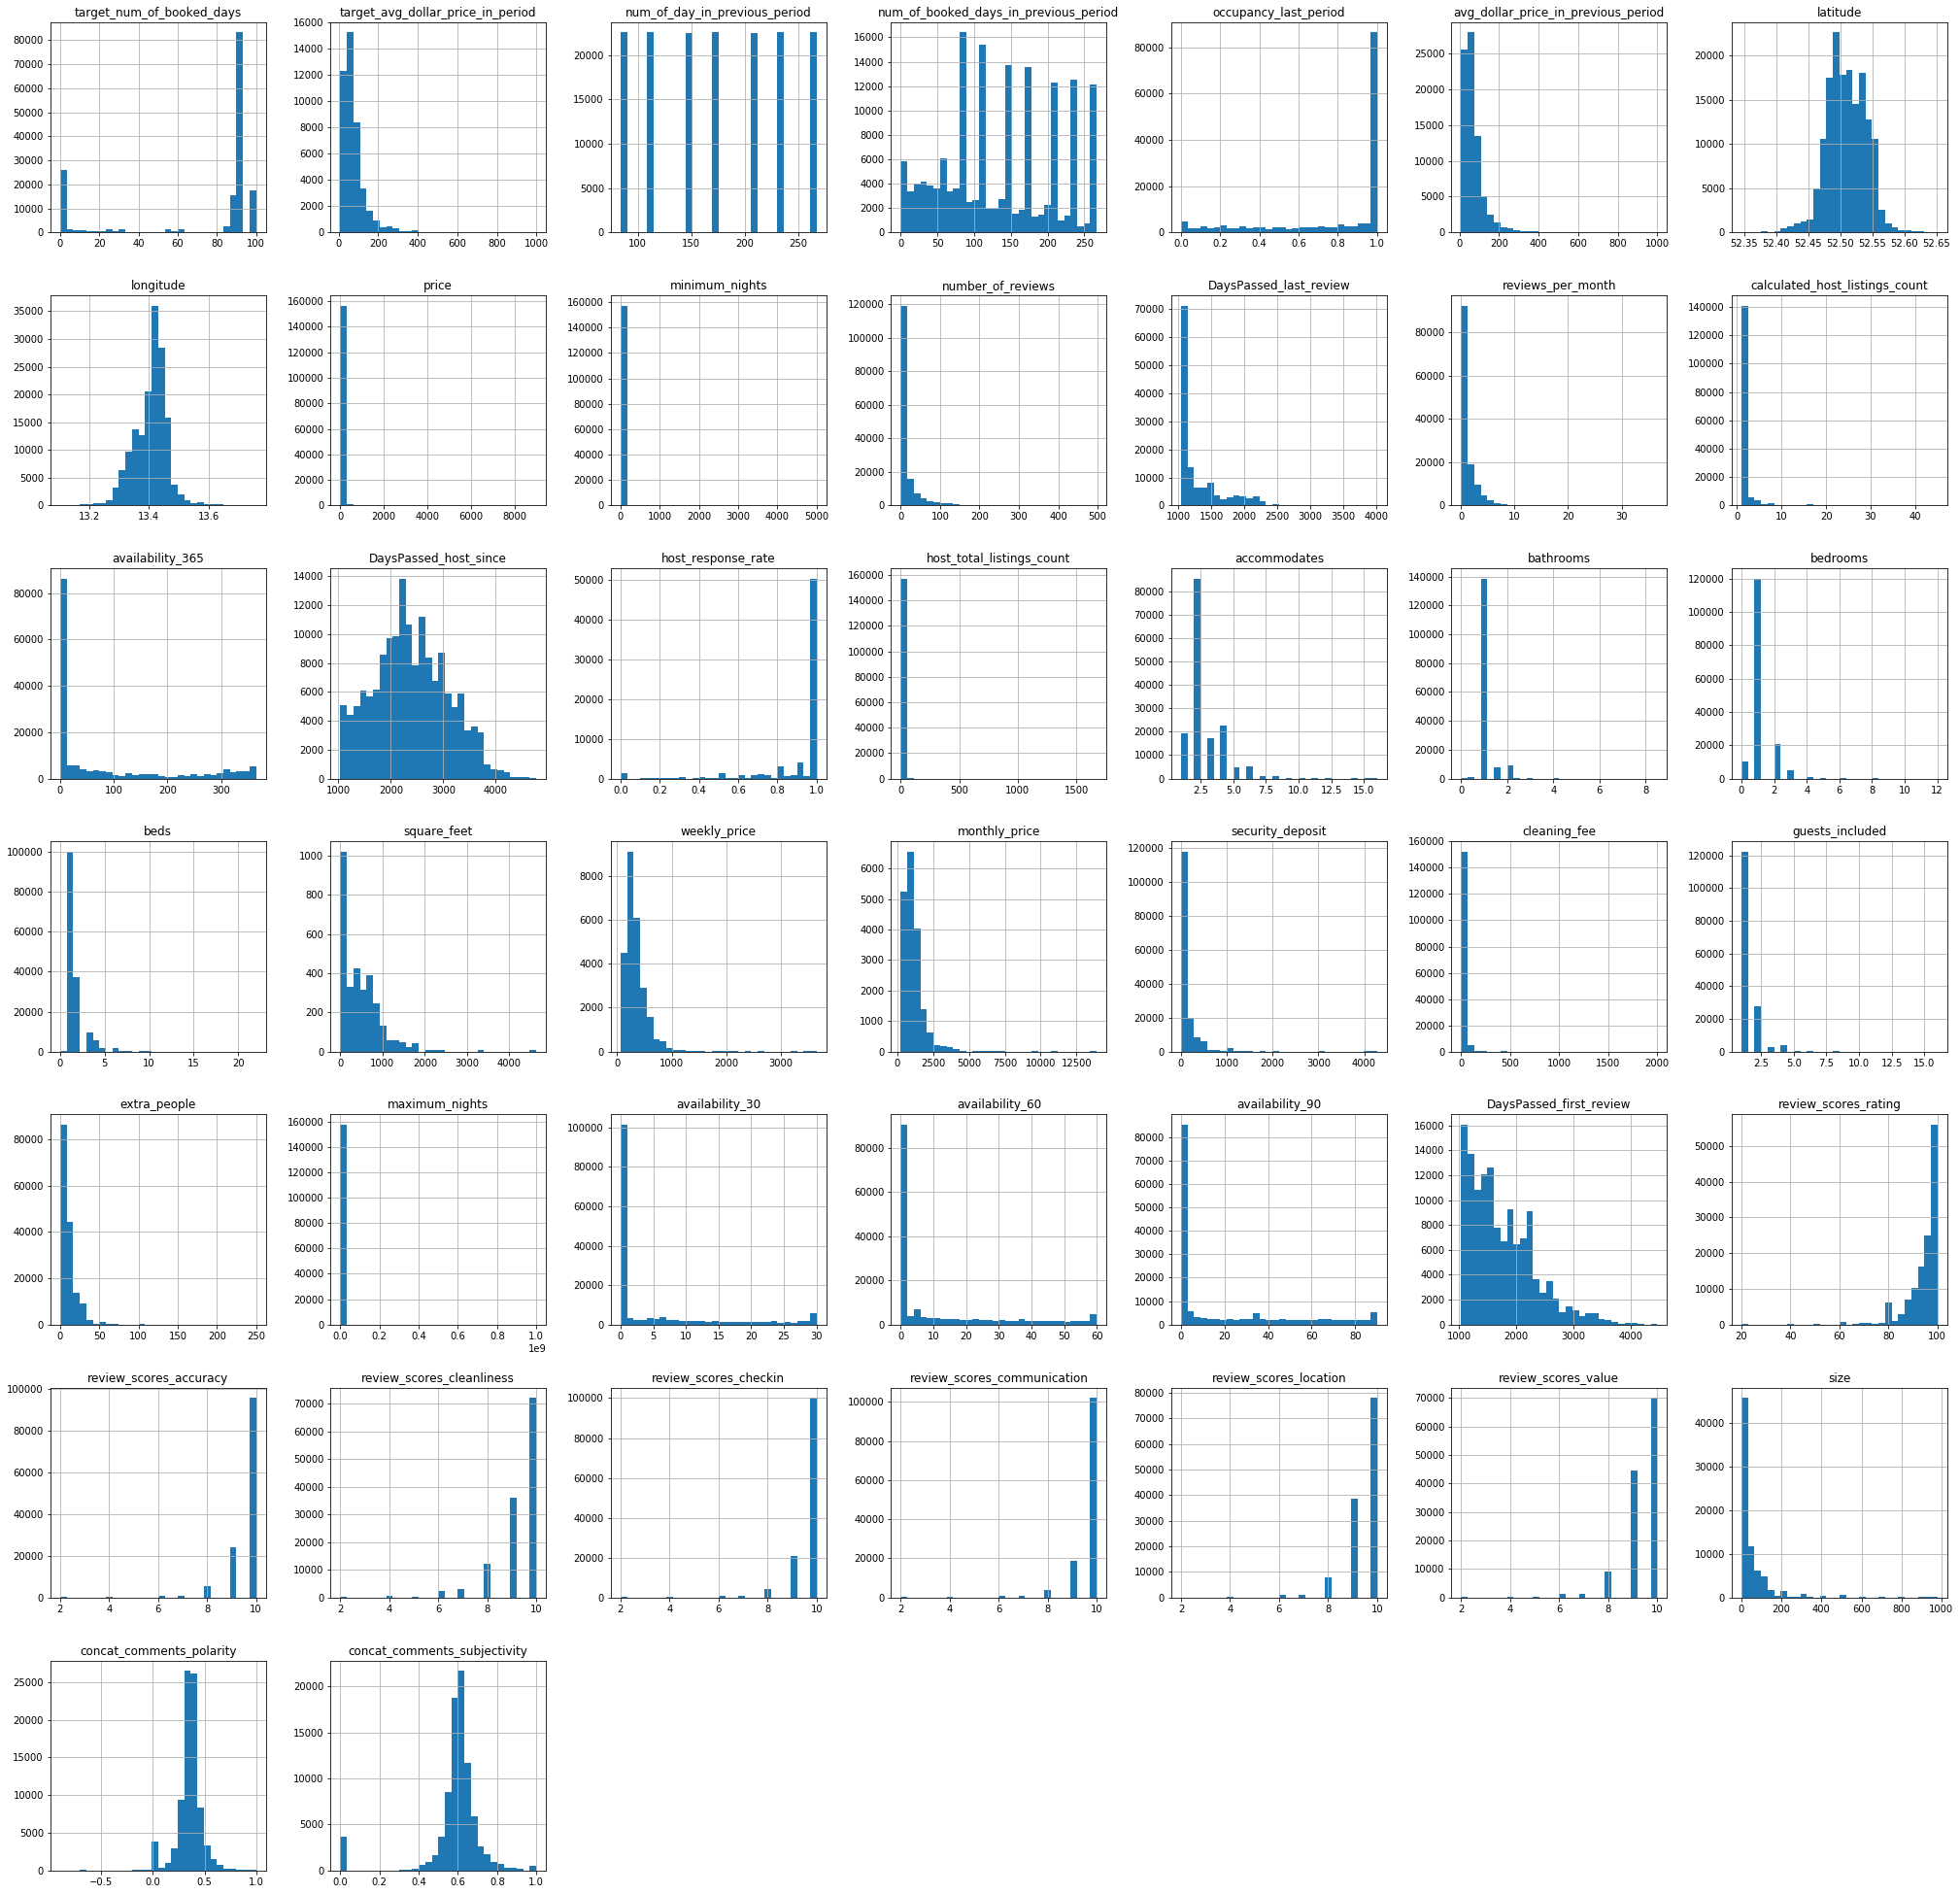

In [23]:
# The distribution of the numeric variables:
columns_to_drop = ['listing_id', 'host_id', 'zipcode', 'host_acceptance_rate','xl_picture_url','medium_url', 'thumbnail_url','jurisdiction_names','news_id']

columns_to_drop = [col_name for col_name in columns_to_drop if col_name in df.columns]

df.drop(columns=columns_to_drop, inplace=False).hist(bins=30, figsize=(35, 35))
plt.show()

#### Location

In [24]:
# Each listing_id has 7 records in df. 
# For ploating the location at the property type, each propetry should appear only once. 

# selecting colums that desribe the property/listening 
df_unique_listings = df[['listing_id',  'name', 'host_id','host_name','neighbourhood_group', 'neighbourhood', 'latitude','longitude', 'room_type','property_type', 'minimum_nights', 'cancellation_policy','host_response_time', 'bathrooms', 'bedrooms', 'accommodates', 'security_deposit', 'cleaning_fee', 'review_scores_communication']]
# Drop Duplicates (the descriptions coulmns of listening id are duplicate 7 times, we need them only once)
df_unique_listings = df_unique_listings.drop_duplicates('listing_id')

print("df num of records:", len(df))
print("df_unique_listings num of records: ", len(df_unique_listings), "Each listing_id appears:", len(df)/len(df_unique_listings))
df_unique_listings.head(3)

df num of records: 157864
df_unique_listings num of records:  22552 Each listing_id appears: 7.0


listing_id                                          name  host_id  \
0         7071              BrightRoom with sunny greenview!    17391   
7         9991           Geourgeous flat - outstanding views    33852   
14       17904  Beautiful Kreuzberg studio/WiFi (reg. pend.)    68997   

   host_name neighbourhood_group             neighbourhood   latitude  \
0     Bright              Pankow            Helmholtzplatz  52.543157   
7    Philipp              Pankow  Prenzlauer Berg S��dwest  52.533031   
14  Matthias           Neuk��lln             Reuterstra��e  52.495476   

    longitude        room_type property_type  minimum_nights  \
0   13.415091     Private room     Apartment             2.0   
7   13.416047  Entire home/apt     Apartment             6.0   
14  13.421821  Entire home/apt     Apartment             5.0   

            cancellation_policy  host_response_time  bathrooms  bedrooms  \
0                      moderate      within an hour        1.0       1.0   
7   strict_14_with_grace_period  within a few hours        2.5       4.0   
14  strict_14_with_grace_period             Missing        1.0       NaN   

    accommodates  security_deposit  cleaning_fee  review_scores_communication  
0            2.0               0.0           0.0                         10.0  
7            7.0             400.0          80.0                         10.0  
14           2.0               0.0          50.0                         10.0

In [25]:
# Map landmarks by properties:
latitude_values = df_unique_listings['latitude'].to_list()
longitude_values =  df_unique_listings['longitude'].to_list()
locations = list(zip(latitude_values, longitude_values))

#values passed in the parameters of Map function are the latitute and longitude of Berlin
finalMap = fl.Map(location=[52.5200, 13.4050], zoom_start=12)
FastMarkerCluster(data=locations).add_to(finalMap)

In [26]:
# Each number in the bellow map is the number of a group of propeties 
# Using Scroll down and up you can view the location of the properties (Cliclk on the numbers for drill down to the property).
finalMap

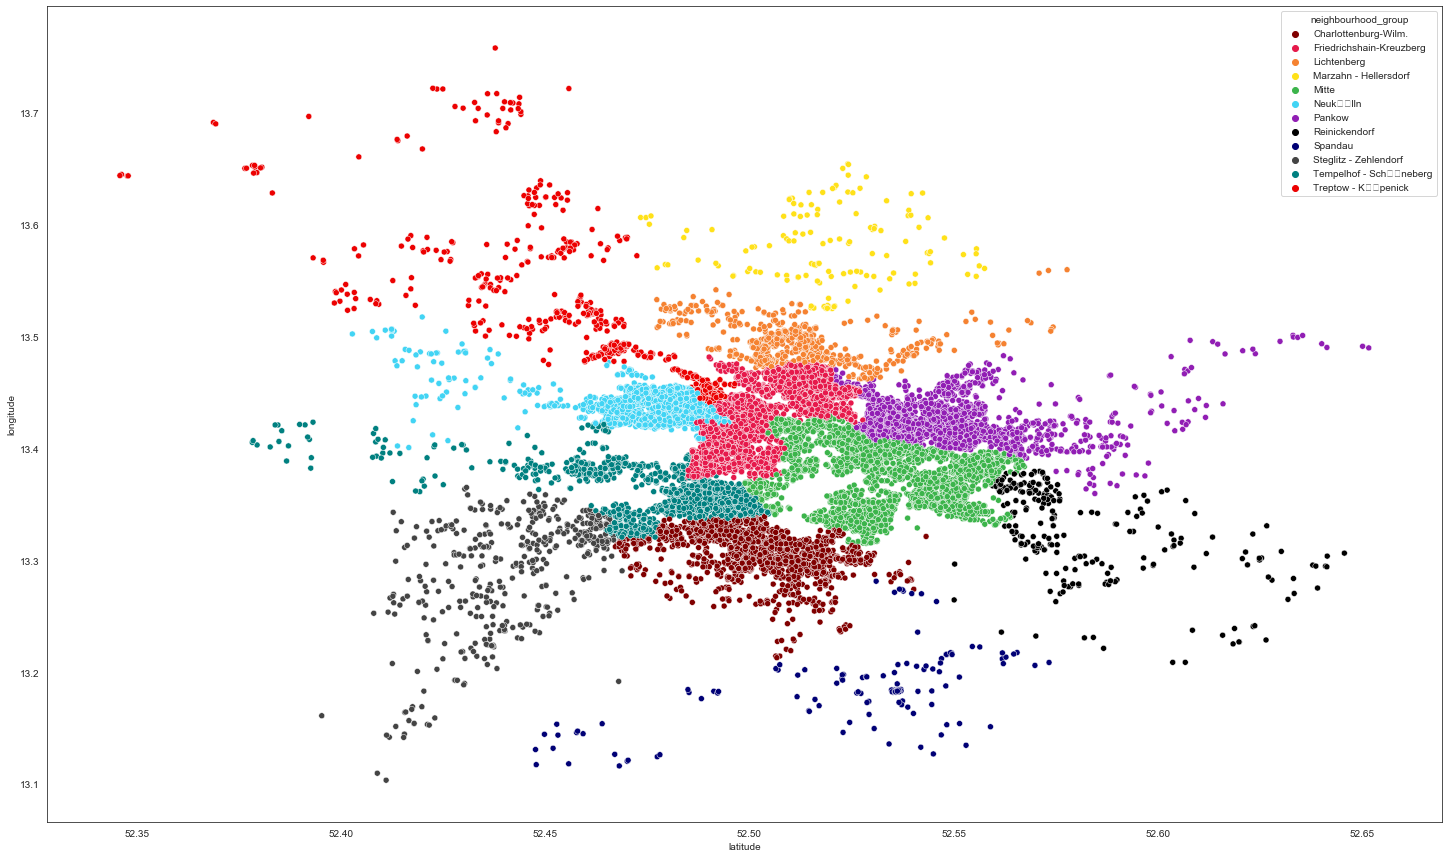

In [27]:
# Plotting map of Berlin by neighbourhood
plt.figure(figsize=(25,15))
sns.set_style('white')
customPalette = ['#800000', '#e6194B', '#f58231', '#ffe119', '#3cb44b', '#42d4f4', '#911eb4', '#000000', '#000075', '#444444', '#008080', '#ec0101']
sns.scatterplot(x=df_unique_listings['latitude'], y=df_unique_listings['longitude'],hue=df_unique_listings["neighbourhood_group"], palette=sns.set_palette(customPalette))
plt.show()

In [28]:
# Count the number of properties in each neighbourhood_group
# Friedrichshain-Kreuzberg, Mitte Pankow and Neuk��lln are the most common neighbourhood group for Air-bnb in Berlin.
df_neighbourhood_group = df_unique_listings['neighbourhood_group'].value_counts()
df_neighbourhood_group

Friedrichshain-Kreuzberg    5497
Mitte                       4631
Pankow                      3541
Neuk��lln                   3499
Charlottenburg-Wilm.        1592
Tempelhof - Sch��neberg     1560
Lichtenberg                  688
Treptow - K��penick          595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        141
Spandau                      124
Name: neighbourhood_group, dtype: int64

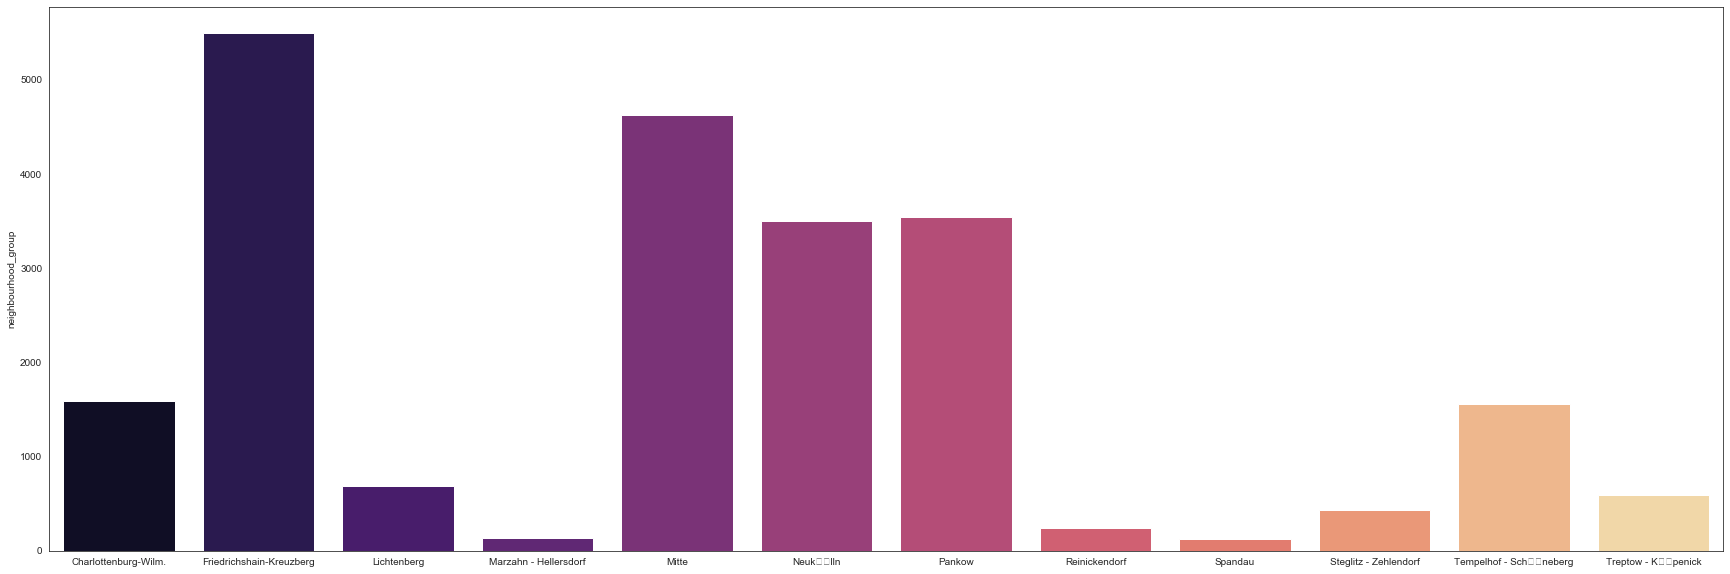

In [29]:
# barplot of neighbourhood_group
plt.figure(figsize=(30,10))
sns.barplot(x=df_neighbourhood_group.index, y=df_neighbourhood_group ,palette=sns.color_palette('magma', n_colors=12))
plt.show()

#### Property type and room type

Text(0.5, 1.0, 'Property type')

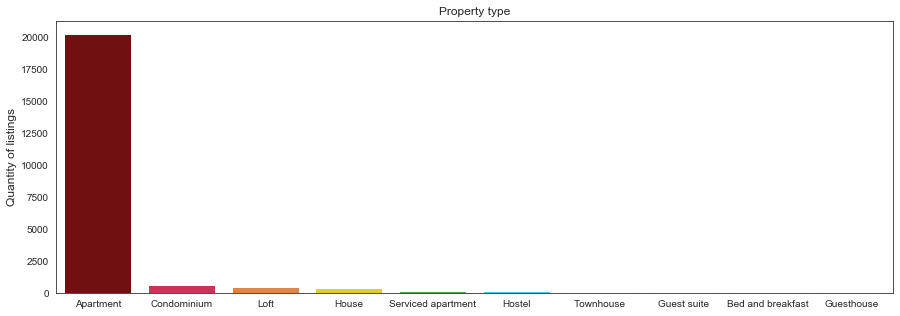

In [30]:
# Property type deployment - TOP-10 types
# Significantly most of the property type in Berlin is an apartment.
plt.figure(figsize = (15,5))
sns.countplot(df_unique_listings['property_type'], order = df_unique_listings.property_type.value_counts().iloc[:10].index)
plt.xlabel("")
plt.ylabel("Quantity of listings", fontsize = 'large')
plt.title("Property type")

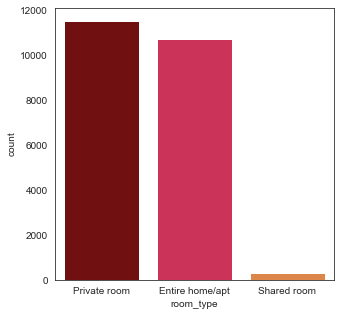

In [31]:
# Room type deployment
plt.figure(figsize = (5,5))
sns.countplot(df_unique_listings['room_type'], order = df_unique_listings.room_type.value_counts(normalize = True).index)

#### Host response time

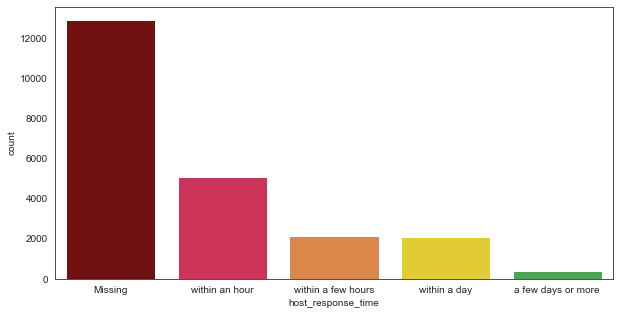

In [32]:
# It looks like a good percentage of hosts respond within an hour.
plt.figure(figsize = (10,5))
sns.countplot(df_unique_listings['host_response_time'], order = df_unique_listings.host_response_time.value_counts(normalize = True).index)


#### minimum_nights

count    22552.000000
mean         7.157059
std         40.665073
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64


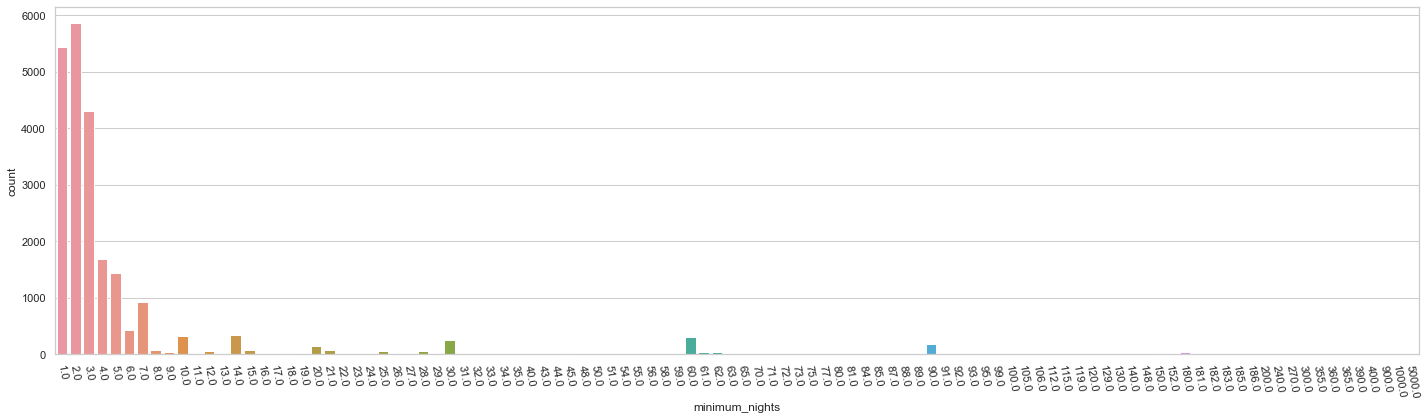

In [33]:
# We can see that there are outliers in the variable "minimum nights" 
# (there are values that are reasonable as minimum nights can, for example, 5k as minimum nights) 
# we will need to take care of this variable in the Data Cleansing section.
# In most cases the requirement for minimum nights is low.

print(df_unique_listings["minimum_nights"].describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(x="minimum_nights", data=df_unique_listings)
plt.xticks(rotation=1000)
plt.tight_layout()


#### bathrooms

count    22520.000000
mean         1.092695
std          0.329894
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.500000
Name: bathrooms, dtype: float64


<Figure size 360x360 with 0 Axes>

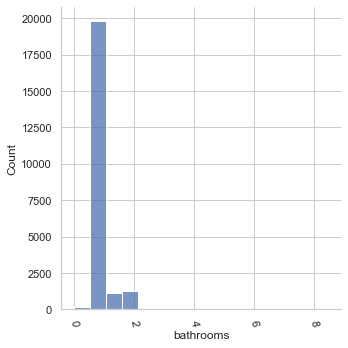

In [34]:
# The values of bathrooms must be integer values and not float such as 8.5 
# Also I need to understand whether it is resonable that property can have 0 or more than 4 bathrooms 
print(df_unique_listings['bathrooms'].describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,5))
sns.displot(data=df_unique_listings , x="bathrooms")
plt.xticks(rotation=1000)
plt.tight_layout()
plt.show()



#### bedrooms

count    22534.000000
mean         1.161134
std          0.646156
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: bedrooms, dtype: float64


<Figure size 360x360 with 0 Axes>

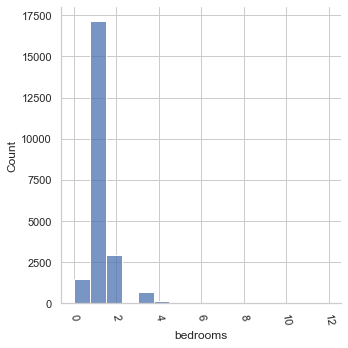

In [35]:
# Need to check whether the following is resonable
# is 0 bedrooms resnoable ? - is it studio property?
# is 12 bedrooms resnoable? - is it releated to the property that has 8 bathrooms?

print(df_unique_listings["bedrooms"].describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,5))
sns.displot(data=df_unique_listings , x="bedrooms")
plt.xticks(rotation=1000)
plt.tight_layout()
plt.show()



#### cancellation_policy

<Figure size 360x360 with 0 Axes>

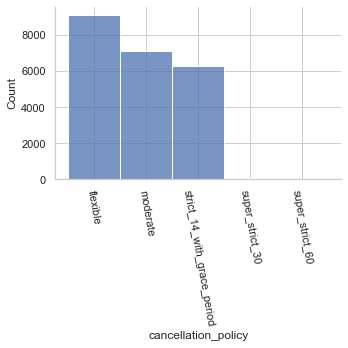

In [36]:
# In most cases the cancellation policy is flexible.
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,5))
sns.displot(data=df_unique_listings , x="cancellation_policy")
plt.xticks(rotation=1000)
plt.tight_layout()
plt.show()

#### review_scores_communication

count    18134.000000
mean         9.730672
std          0.686614
min          2.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_communication, dtype: float64


<Figure size 360x360 with 0 Axes>

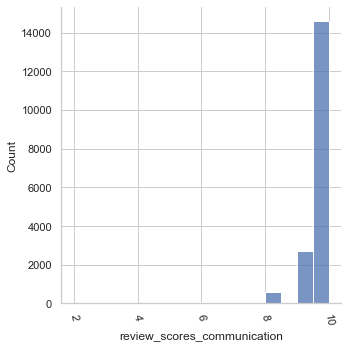

In [37]:
# the values review_scores_communication in the range between 0 to 10.
# the bellow seems reasonable, so no need to handle this in the data cleansing stage
print(df_unique_listings["review_scores_communication"].describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,5))
sns.displot(data=df_unique_listings , x="review_scores_communication")
plt.xticks(rotation=1000)
plt.tight_layout()
plt.show()


#### Availability / Occupancy

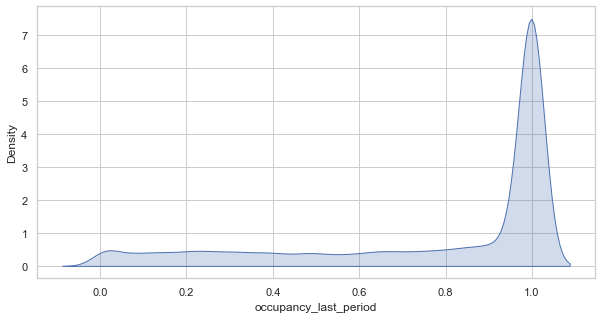

In [38]:
# Checking the occupancy perecantge in the last period (the period before the target)
# the bellow seems reasonable, so no need to handle this in the data cleansing stage

plt.figure(figsize=(10,5))
sns.kdeplot(data=df.occupancy_last_period, shade=True)

#### number_of_reviews

count    157864.000000
mean         17.840679
std          36.768925
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max         498.000000
Name: number_of_reviews, dtype: float64


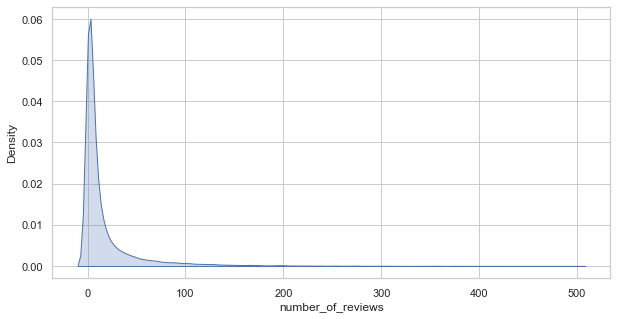

In [39]:
# We can see that there are outliers in the variable "number_of_reviews".
# we can assume that outliers are resnoable, there are some properies with many reviews. 
print(df['number_of_reviews'].describe())
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.number_of_reviews, shade=True)

#### review_scores_rating

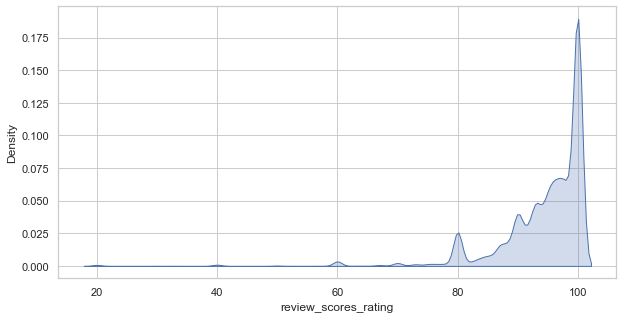

In [40]:
# We can see that there are outliers in the variable "review_scores_rating".
# The review score rating are in range 0 to 100 (no need to handle this in data cleansing section)  

plt.figure(figsize=(10,5))
sns.kdeplot(data=df.review_scores_rating, shade=True)

#### price

count    157864.000000
mean         67.143668
std         220.262024
min           0.000000
25%          30.000000
50%          45.000000
75%          70.000000
max        9000.000000
Name: price, dtype: float64


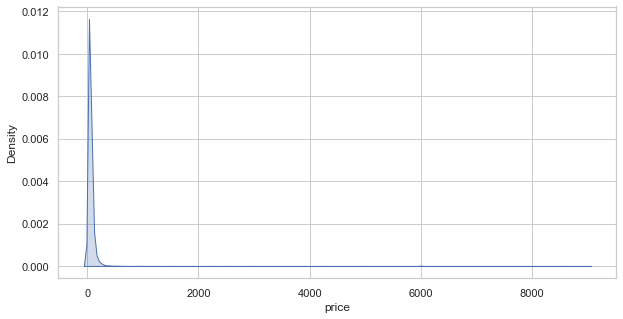

In [41]:
# There are some records with not reasonable price for a night, 
# we need to check whether a price of 9K is reasonable per night and if not fixing it as outliers
print(df['price'].describe())
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.price, shade=True)

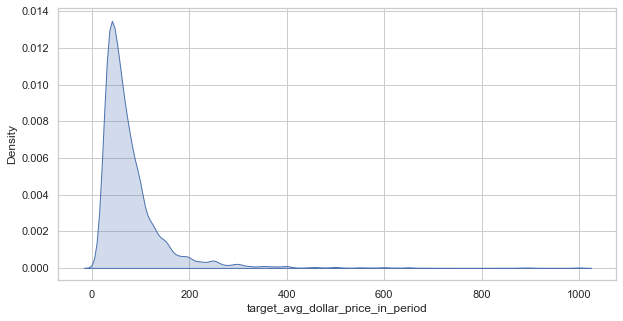

In [42]:
# Average dollar price in the target period
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.target_avg_dollar_price_in_period, shade=True)

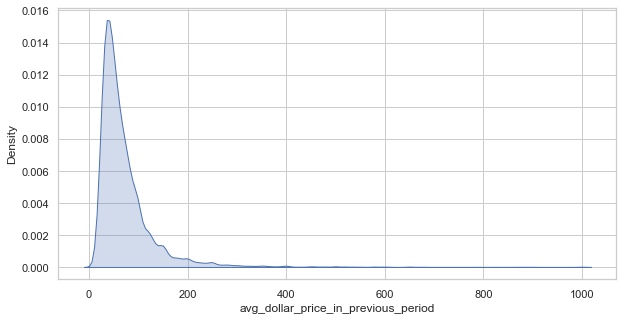

In [43]:
# Average dollar price in the previous period
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.avg_dollar_price_in_previous_period, shade=True)

#### security_deposit

count    157864.000000
mean        118.284454
std         304.226880
min           0.000000
25%           0.000000
50%           0.000000
75%         150.000000
max        4280.000000
Name: security_deposit, dtype: float64


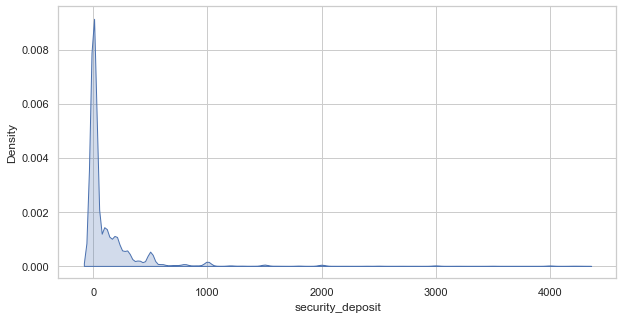

In [44]:
# It seems there are outliers in the security deposit that need to be handle.

print(df['security_deposit'].describe())
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.security_deposit, shade=True)

#### cleaning_fee

count    157864.000000
mean         18.253991
std          28.172281
min           0.000000
25%           0.000000
50%          10.000000
75%          30.000000
max        2000.000000
Name: cleaning_fee, dtype: float64


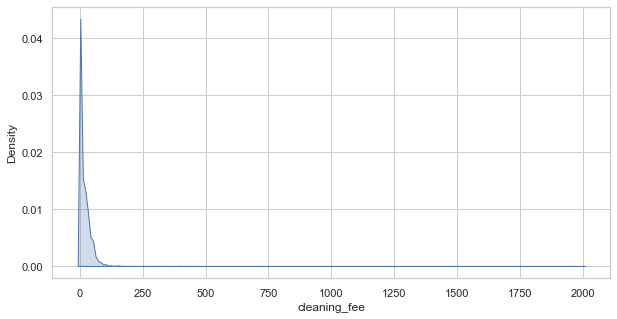

In [45]:
# It seems there are outliers in the cleaning fee that need to be handle in data cleasing stage

print(df['cleaning_fee'].describe())
plt.figure(figsize=(10,5))
sns.kdeplot(data=df.cleaning_fee, shade=True)

#### amentities

In [46]:
# amentities are list of strings, in feature engineering I will cast each string to catgeory
# (and using dummies or one hot encoding)
df['amenities']

0         {Wifi,Heating,"Family/kid friendly",Essentials...
1         {Wifi,Heating,"Family/kid friendly",Essentials...
2         {Wifi,Heating,"Family/kid friendly",Essentials...
3         {Wifi,Heating,"Family/kid friendly",Essentials...
4         {Wifi,Heating,"Family/kid friendly",Essentials...
                                ...                        
157859    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
157860    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
157861    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
157862    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
157863    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
Name: amenities, Length: 157864, dtype: object

#### host_verifications

In [47]:
# host_verifications are list of strings, in feature engineering I will cast each string to catgeory 
# (and using dummies or one hot encoding)

df['host_verifications']

0         ['email', 'phone', 'reviews', 'jumio', 'govern...
1         ['email', 'phone', 'reviews', 'jumio', 'govern...
2         ['email', 'phone', 'reviews', 'jumio', 'govern...
3         ['email', 'phone', 'reviews', 'jumio', 'govern...
4         ['email', 'phone', 'reviews', 'jumio', 'govern...
                                ...                        
157859            ['email', 'phone', 'facebook', 'reviews']
157860            ['email', 'phone', 'facebook', 'reviews']
157861            ['email', 'phone', 'facebook', 'reviews']
157862            ['email', 'phone', 'facebook', 'reviews']
157863            ['email', 'phone', 'facebook', 'reviews']
Name: host_verifications, Length: 157864, dtype: object

## Correlations

In this section, I explore the relationship between the continuous variables. 

The correlation coefficient can range from -1 to +1, which signifies a strong negative to a strong positive relationship between the variables.
Though correlation analysis helps us in understanding the association between two variables in a dataset, it can't explain, or measure, the cause.

The p-value helps to determine the significance of the results, when p-value<0.05 it means that the correlation is significance.

In [48]:
# correlation matrix
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

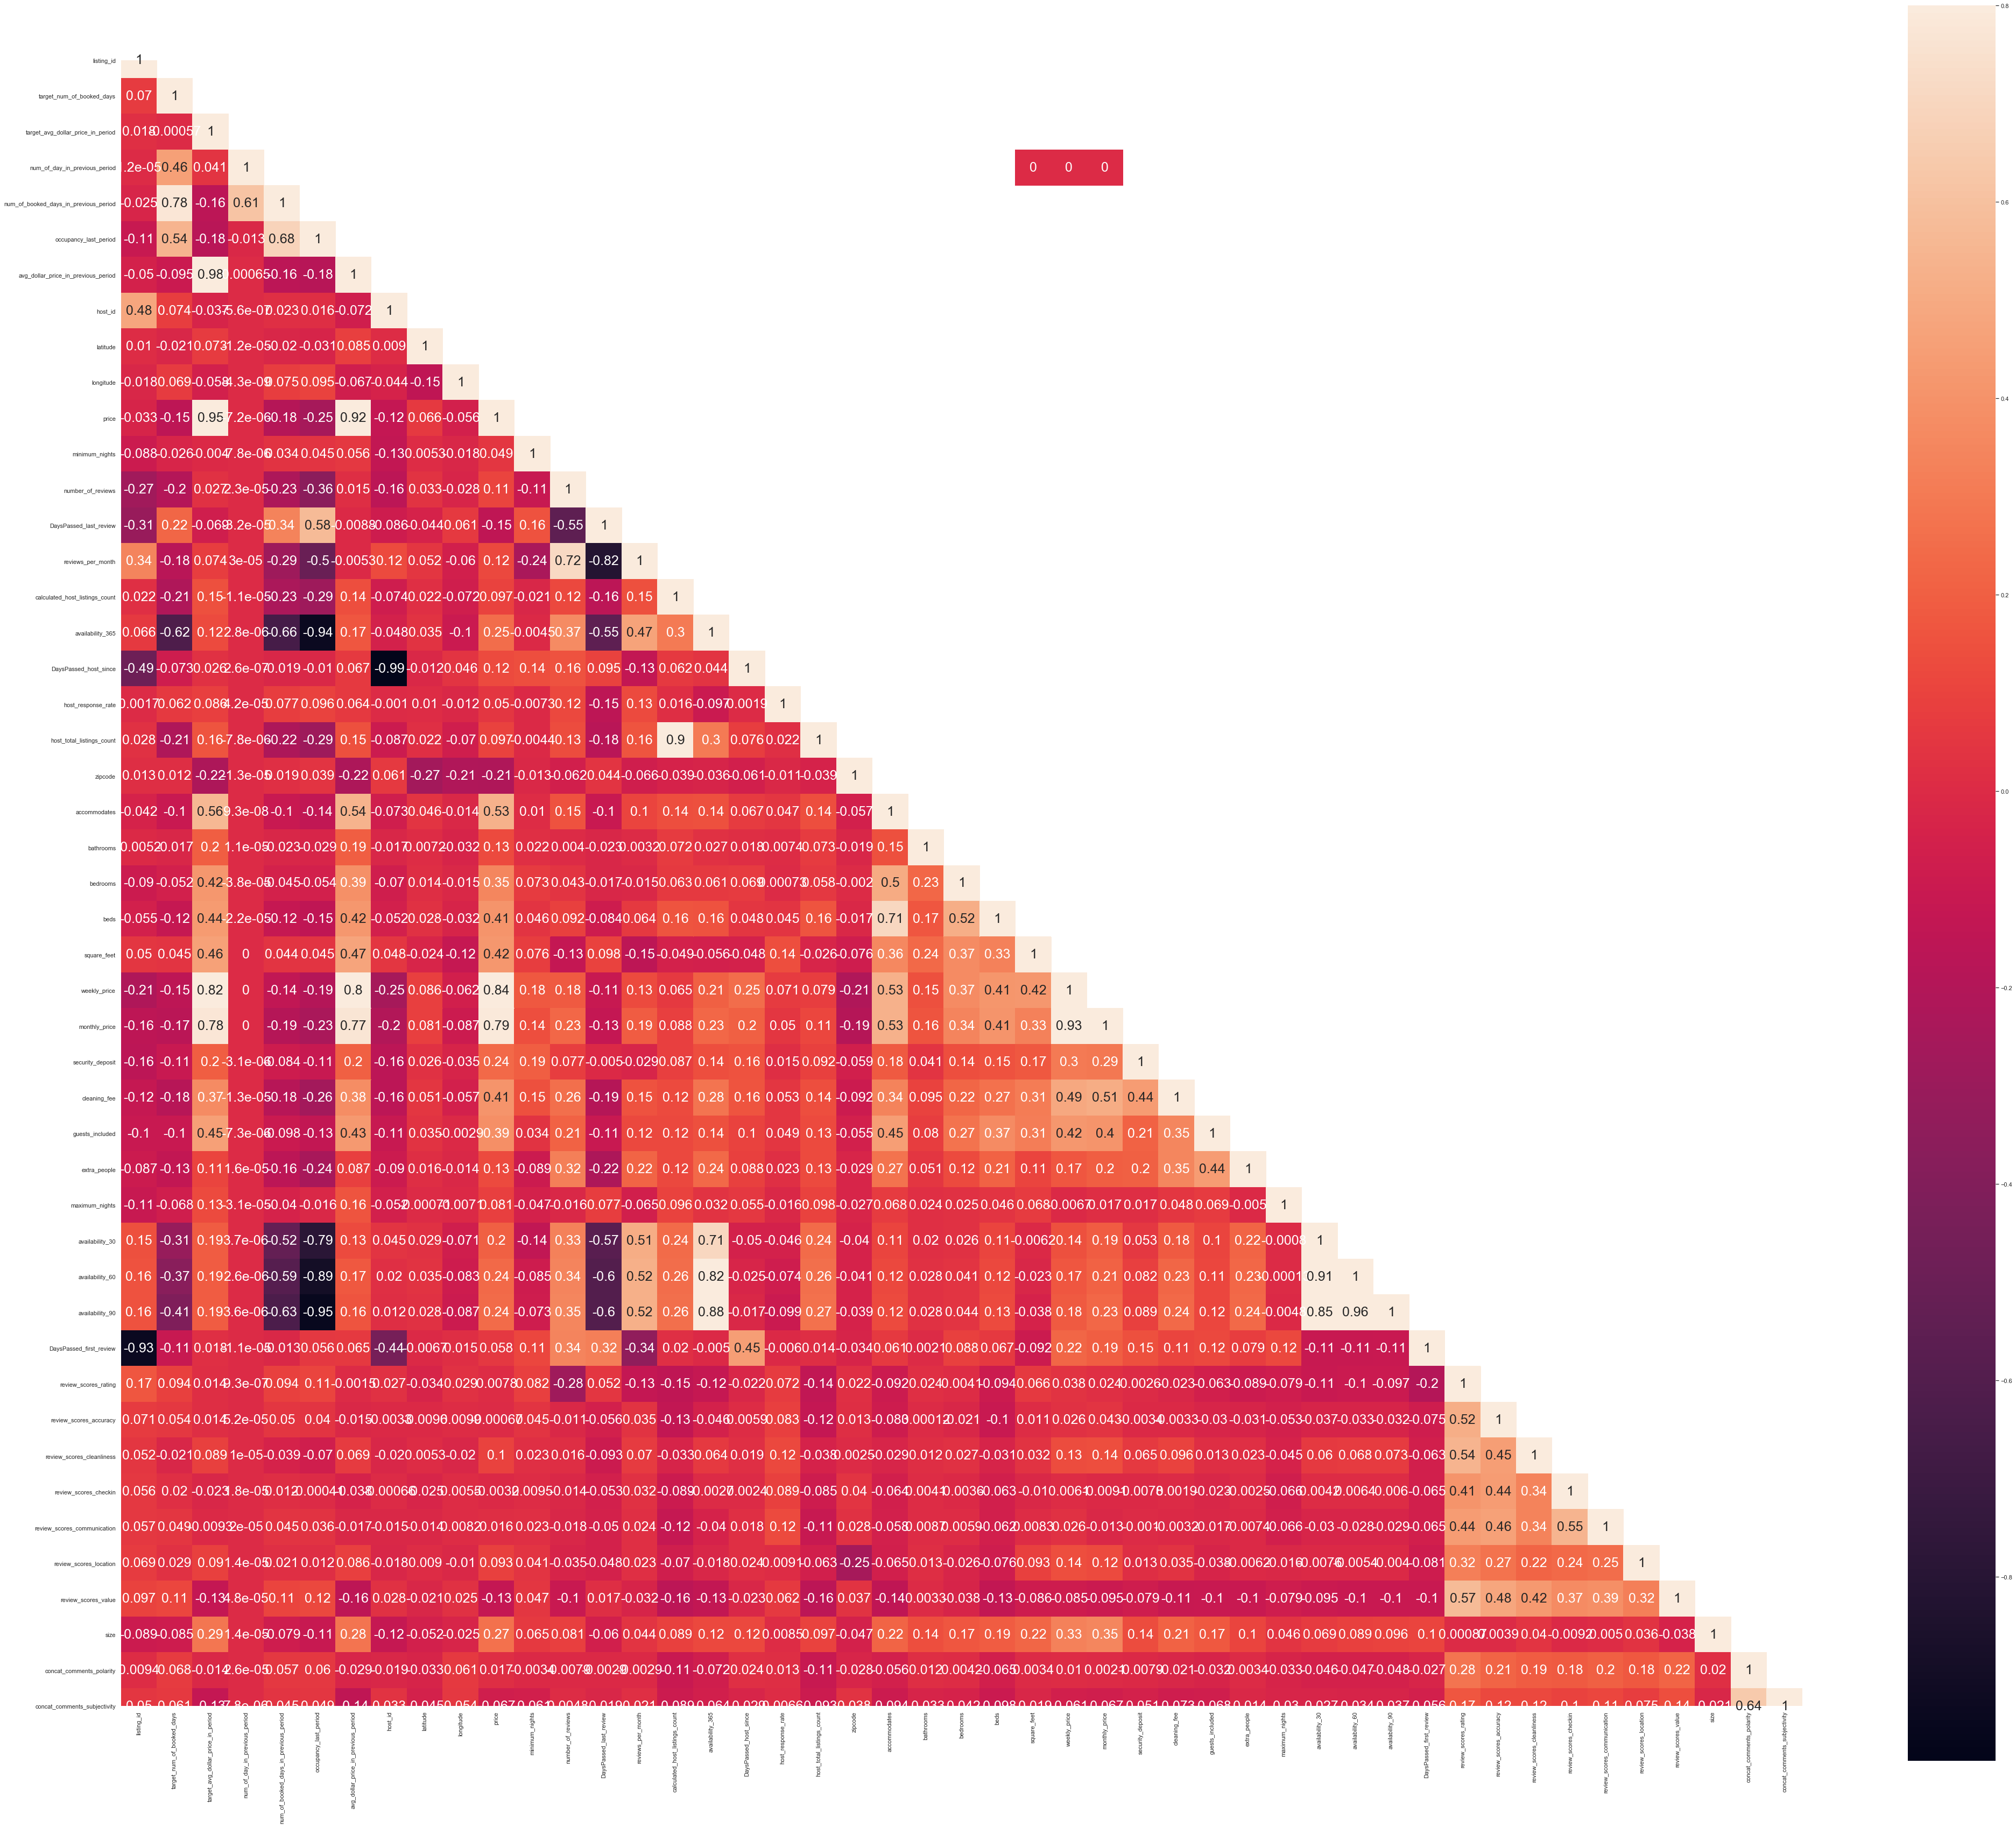

In [49]:
corrMatt = df.corr(method='spearman')
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(70,60)
sns.heatmap(corrMatt, mask=mask,vmax=0.8, square=True,annot=True, annot_kws={'size':25})
plt.show()

In [50]:
# Creating two functions :
# 1- my_spearmanr- Spearman's rank correlation coefficient test, which is a nonparametric measure of rank correlation
# 2- all_numric_correlations - list of all the combinations numeric correlations and their p-value
    

def my_spearmanr(df, x1, x2):
    """
    
    """
    df_sub = df[[x1,x2]].dropna(axis=0, inplace=False)
    return stats.spearmanr(df_sub[x1],df_sub[x2])
   

def all_numric_correlations(df, numeric_columns_list, max_pvalue_threshold=0.05):
    
    """
    res = list(combinations(['a' ,'b', 'c'], 2))
    res = [('a', 'b'), ('a', 'c'), ('b', 'c')]
    """
    numeric_combinations_list = list(combinations(numeric_columns_list, 2))
    results_list = []
    for col1, col2 in numeric_combinations_list:
        my_spearmanr_res = my_spearmanr(df, col1, col2)
        pvalue=my_spearmanr_res[1]
        if pvalue < max_pvalue_threshold:
            results_list.append({"var1": col1, "var2": col2, "correlation": my_spearmanr_res[0], "pvalue": my_spearmanr_res[1]})
    
    df_results = pd.DataFrame(results_list).sort_values(by='correlation', ascending=False)
    return df_results


In [51]:
pd.set_option('display.max_rows', 1000)
numeric_columns_list = d_of_columns_types_local['float64'] + d_of_columns_types_local['int64']

df_numric_correlations = all_numric_correlations(df,numeric_columns_list)
df_numric_correlations

var1  \
1      target_avg_dollar_price_in_period   
805                      availability_60   
4      target_avg_dollar_price_in_period   
667                         weekly_price   
88   avg_dollar_price_in_previous_period   
790                      availability_30   
378       calculated_host_listings_count   
427                     availability_365   
791                      availability_30   
217                                price   
426                     availability_365   
19     target_avg_dollar_price_in_period   
919          target_num_of_day_in_period   
921            target_num_of_booked_days   
103  avg_dollar_price_in_previous_period   
218                                price   
923            target_num_of_booked_days   
20     target_avg_dollar_price_in_period   
104  avg_dollar_price_in_previous_period   
274                    number_of_reviews   
554                         accommodates   
425                     availability_365   
83                 occupancy_last_period   
85                 occupancy_last_period   
910             concat_comments_polarity   
925                     booked_up_target   
926        num_of_day_in_previous_period   
48                 occupancy_last_period   
850                 review_scores_rating   
14     target_avg_dollar_price_in_period   
876                review_scores_checkin   
846                 review_scores_rating   
82                 occupancy_last_period   
917          target_num_of_day_in_period   
98   avg_dollar_price_in_previous_period   
556                         accommodates   
557                         accommodates   
212                                price   
361                    reviews_per_month   
360                    reviews_per_month   
603                             bedrooms   
845                 review_scores_rating   
688                        monthly_price   
359                    reviews_per_month   
553                         accommodates   
920          target_num_of_day_in_period   
669                         weekly_price   
860               review_scores_accuracy   
102  avg_dollar_price_in_previous_period   
343                    reviews_per_month   
858               review_scores_accuracy   
18     target_avg_dollar_price_in_period   
922            target_num_of_booked_days   
23     target_avg_dollar_price_in_period   
856               review_scores_accuracy   
457                DaysPassed_host_since   
560                         accommodates   
706                     security_deposit   
848                 review_scores_rating   
857               review_scores_accuracy   
741                      guests_included   
17     target_avg_dollar_price_in_period   
107  avg_dollar_price_in_previous_period   
869            review_scores_cleanliness   
101  avg_dollar_price_in_previous_period   
670                         weekly_price   
16     target_avg_dollar_price_in_period   
651                          square_feet   
216                                price   
627                                 beds   
847                 review_scores_rating   
220                                price   
628                                 beds   
215                                price   
689                        monthly_price   
100  avg_dollar_price_in_previous_period   
221                                price   
886          review_scores_communication   
106  avg_dollar_price_in_previous_period   
276                    number_of_reviews   
605                             bedrooms   
878                review_scores_checkin   
604                             bedrooms   
22     target_avg_dollar_price_in_period   
631                                 beds   
555                         accommodates   
294                    number_of_reviews   
701                        monthly_price   
214                                price   
724                         cleaning_fee   
725                         clea

Let's see relationship between some variables in graphs 

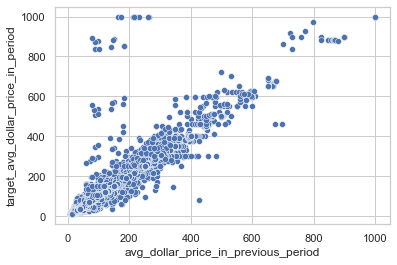

In [52]:
sns.scatterplot(data=df, x='avg_dollar_price_in_previous_period', y='target_avg_dollar_price_in_period')

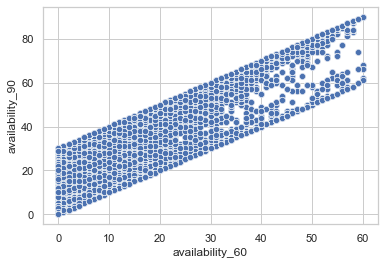

In [53]:
sns.scatterplot(data=df, x='availability_60', y='availability_90')

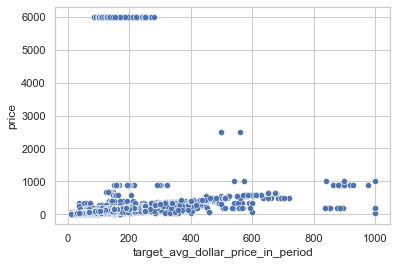

In [54]:
sns.scatterplot(data=df, x='target_avg_dollar_price_in_period', y='price')

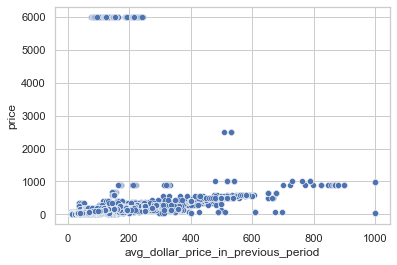

In [55]:
sns.scatterplot(data=df, x='avg_dollar_price_in_previous_period', y='price')

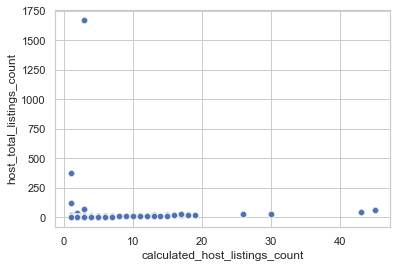

In [56]:
sns.scatterplot(data=df, x='calculated_host_listings_count', y='host_total_listings_count')

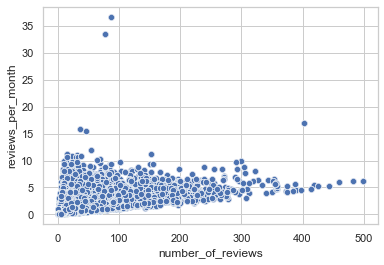

In [57]:
sns.scatterplot(data=df, x='number_of_reviews', y='reviews_per_month')

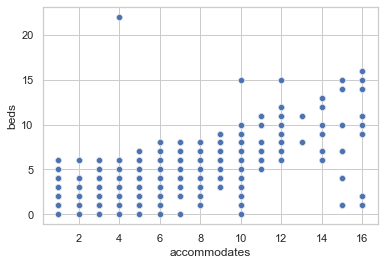

In [58]:
sns.scatterplot(data=df, x='accommodates', y='beds')

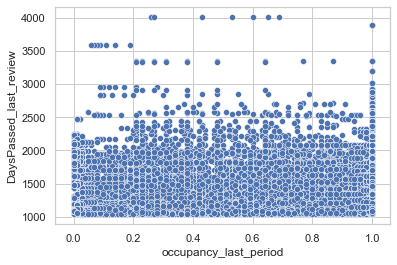

In [59]:
sns.scatterplot(data=df, x='occupancy_last_period', y='DaysPassed_last_review')

## booked_up - Target variable

In this section, I examine the target variable - "booked_up_target",  which is a categorical variable.
To explore how the variable distributes and its relationships with the variables.

I examine whether there are numerical or categorical variables that show a significant difference in the distribution of the target variable- "booked_up_target".

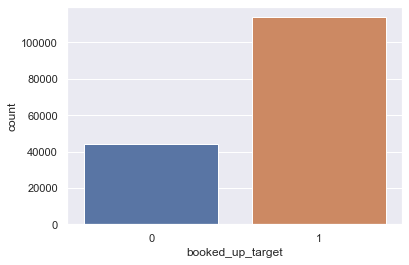

In [60]:
# The target variable distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="booked_up_target", data=df)

In [61]:
df_booked_up_target_summary = df["booked_up_target"].value_counts().to_frame()
df_booked_up_target_summary

booked_up_target
1            113873
0             43991

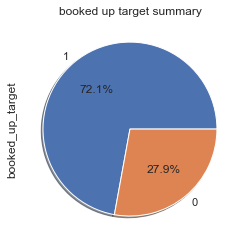

In [62]:
import matplotlib.pyplot as plt
plot = df_booked_up_target_summary.plot.pie(y='booked_up_target', title="booked up target summary", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [63]:
# Let's see our numeric variables so far
numeric_list= d_of_columns_types_local['int64'] + d_of_columns_types_local['float64']
numeric_list

['target_num_of_day_in_period',
 'target_num_of_booked_days',
 'booked_up_target',
 'num_of_day_in_previous_period',
 'num_of_booked_days_in_previous_period',
 'target_avg_dollar_price_in_period',
 'occupancy_last_period',
 'avg_dollar_price_in_previous_period',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'DaysPassed_last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'scrape_id',
 'DaysPassed_host_since',
 'host_response_rate',
 'host_total_listings_count',
 'zipcode',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'DaysPassed_first_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_locatio

In [66]:
pprint.pprint(d_of_columns_types_local)

{'category': ['neighbourhood_group',
              'room_type',
              'host_response_time',
              'host_is_superhost',
              'host_has_profile_pic',
              'host_identity_verified',
              'bed_type',
              'instant_bookable',
              'is_business_travel_ready',
              'require_guest_profile_picture',
              'require_guest_phone_verification',
              'cancellation_policy',
              'concat_comments_sentiment'],
 'float64': ['target_avg_dollar_price_in_period',
             'occupancy_last_period',
             'avg_dollar_price_in_previous_period',
             'latitude',
             'longitude',
             'price',
             'minimum_nights',
             'number_of_reviews',
             'DaysPassed_last_review',
             'reviews_per_month',
             'calculated_host_listings_count',
             'availability_365',
             'scrape_id',
             'DaysPassed_host_since',
            

In [73]:
df["booked_up_target"] = df["booked_up_target"].astype(int)

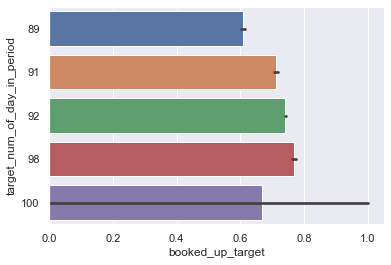

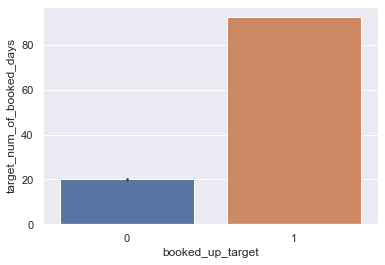

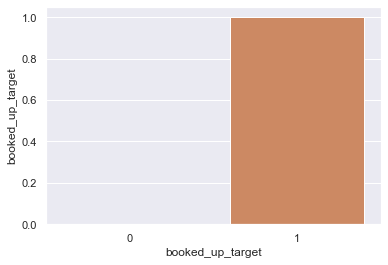

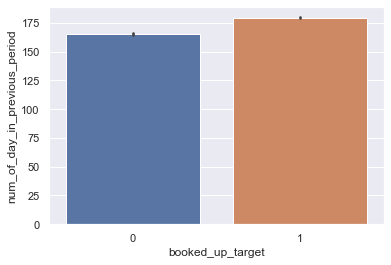

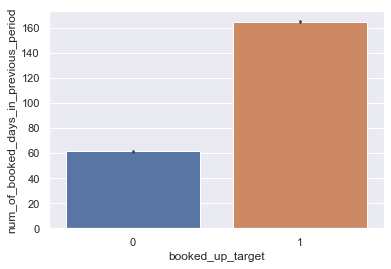

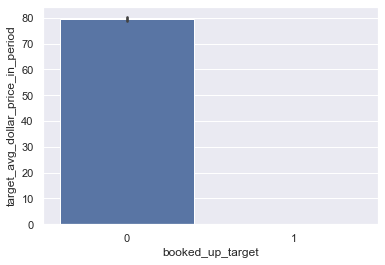

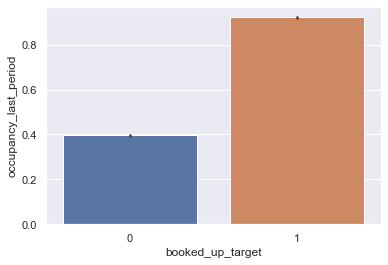

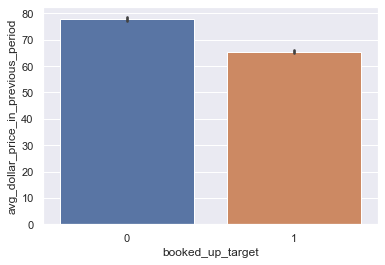

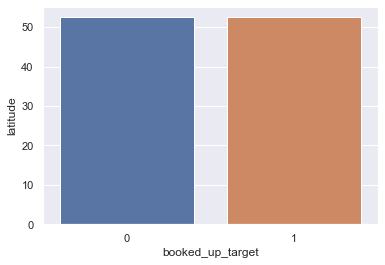

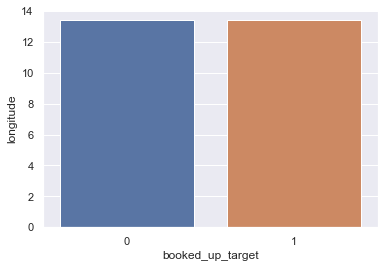

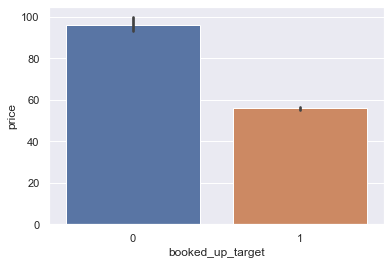

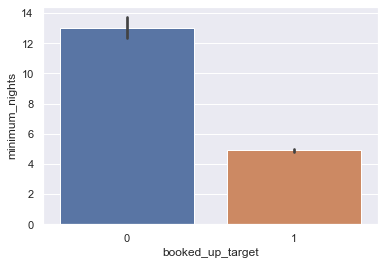

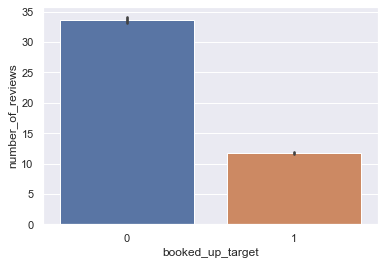

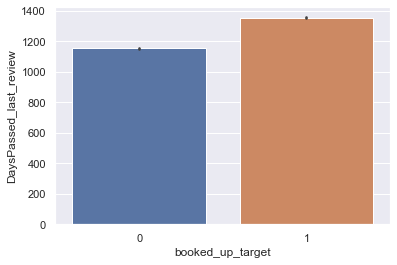

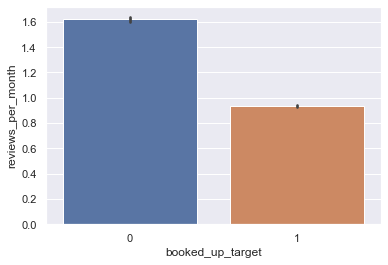

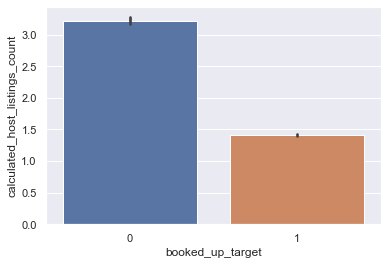

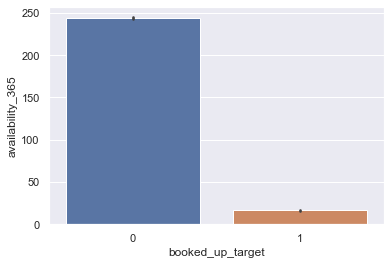

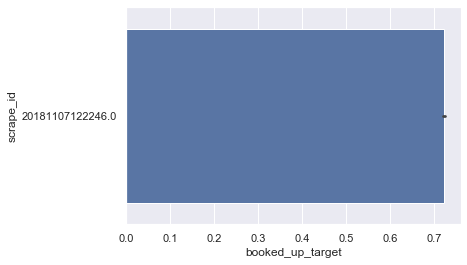

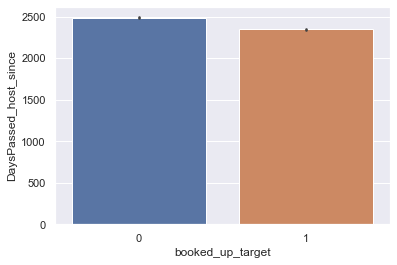

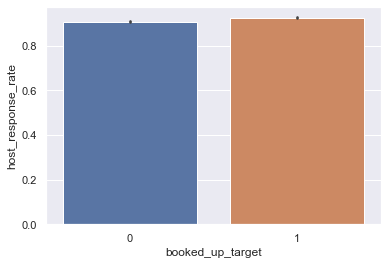

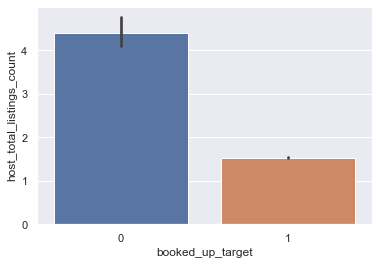

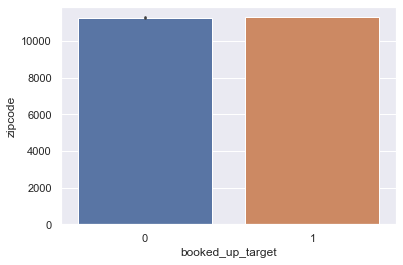

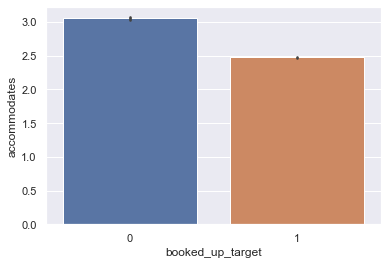

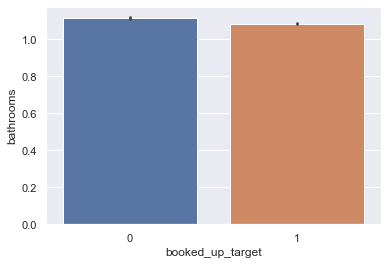

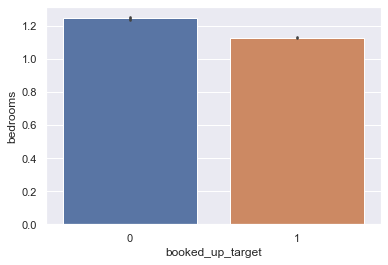

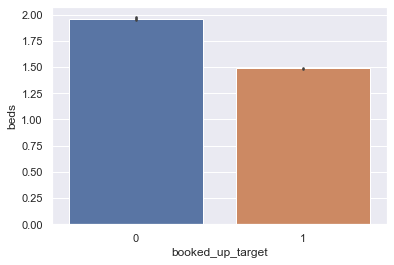

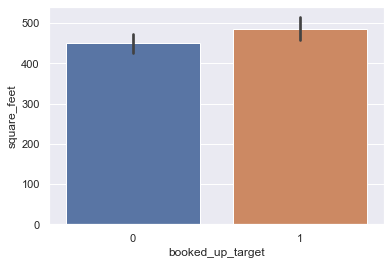

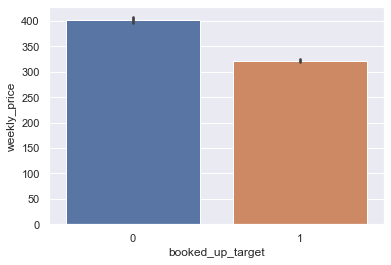

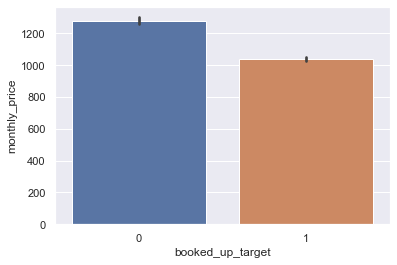

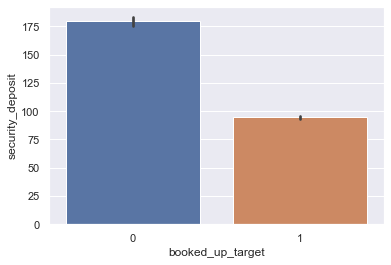

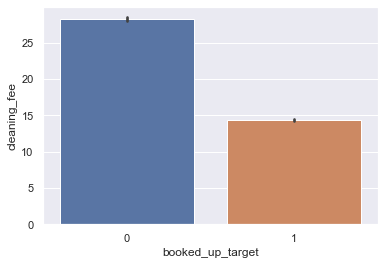

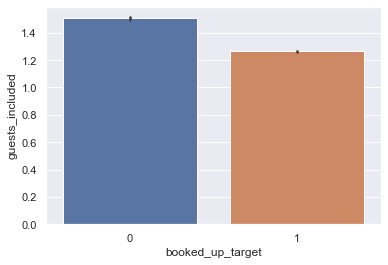

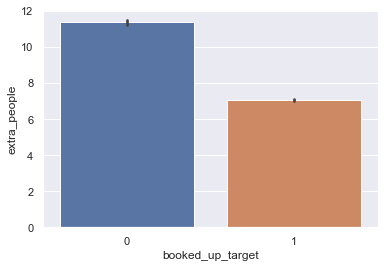

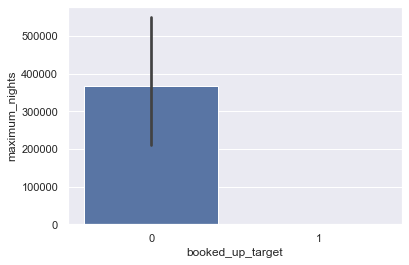

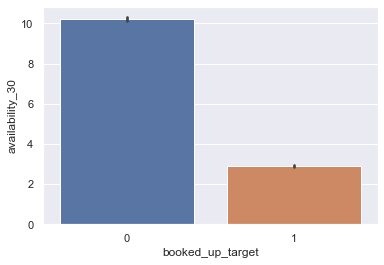

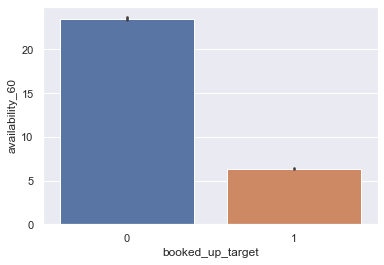

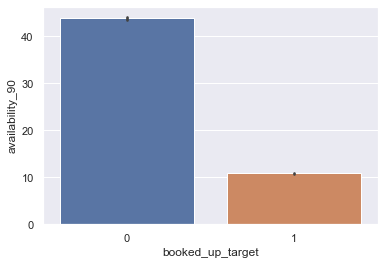

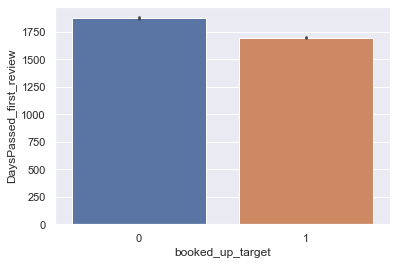

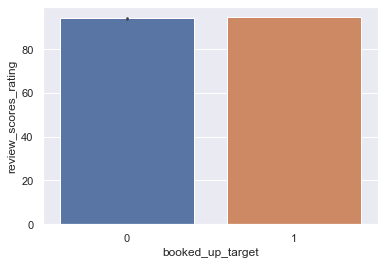

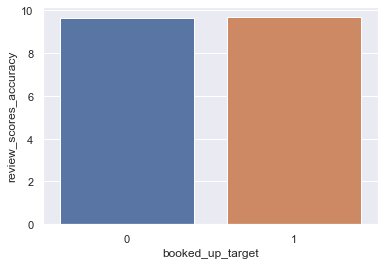

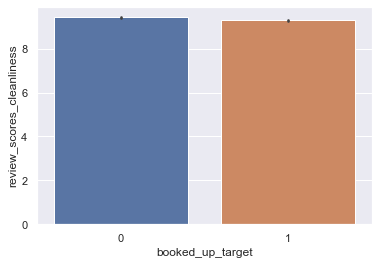

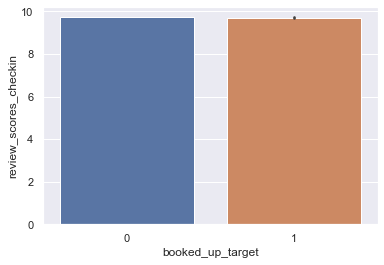

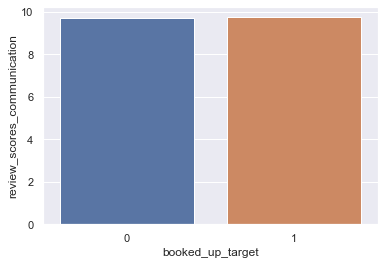

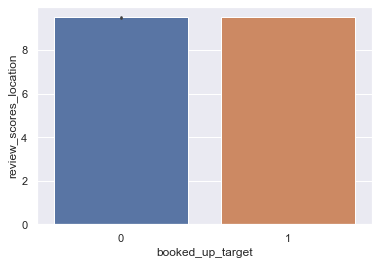

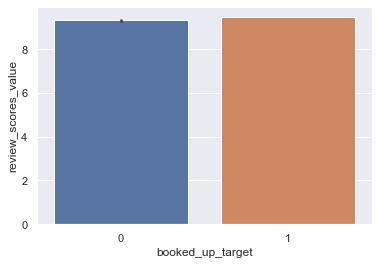

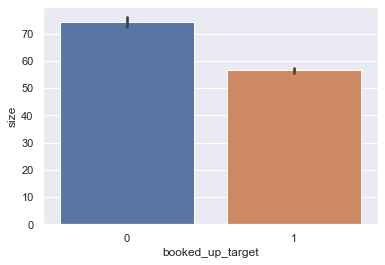

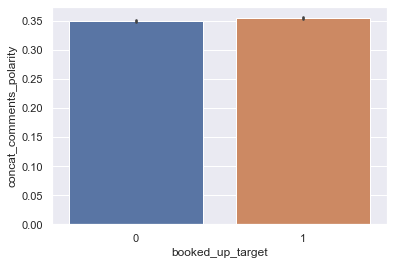

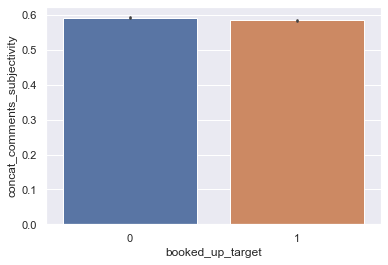

In [74]:
# Let's explore the relationships between the numeric variables and the target with barplot
for y in numeric_list:
    plt.figure()
    sns.barplot(x="booked_up_target", y=y, data=df)

In [ ]:
# Let's explore the relationships between the numeric variables and the target with boxplot
for y in numeric_list:
    plt.figure()
    sns.catplot(x="booked_up_target", y=y, kind="box", data=df)

In [ ]:
# Let's explore the relationships between the categorical variables and the target 
# in order to check if the outcome is affected by any categorical variable
for y in d_of_columns_types_local['category']:
    plt.figure(figsize = (30,10))
    sns.factorplot(x =y, y ="booked_up_target", data = df, kind ='bar')


### Mann–Whitney U test

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations. 

The goal is to find out if there are any differences between the target variable - "booked_up_target" (category) and the other numeric variables.

In [ ]:
# Creating two functions :
# 1- my_mannwhitneyu: for Mann–Whitney U test.
# 2- all_combination_mannwhitneyu: Creating the Dataframe of the results for the test, when p-value<0.05 (only the significance differences). 
def my_mannwhitneyu(df, x, y):
    """
    
    """
    df_sub = df[[x,y]].dropna(axis=0, inplace=False)
    return stats.mannwhitneyu(df_sub[x],df_sub[y])


def all_combination_mannwhitneyu(df, numeric_columns_list, y_target="booked_up_target", max_pvalue_threshold=0.05):
    results_list = []
    for num_col in numeric_columns_list:
        mannwhitneyu_res = my_mannwhitneyu(df, num_col, y_target)
        pvalue=mannwhitneyu_res[1]
        if pvalue < max_pvalue_threshold:
            res = {"x": num_col, "y":y_target,"statistic":mannwhitneyu_res[0], "pvalue":mannwhitneyu_res[1]}
        results_list.append(res)
    df_results = pd.DataFrame(results_list).sort_values(by='statistic', ascending=False)
    return df_results

In [ ]:
# Dataframe with only the variables that have significant differences to the target variable
numeric_columns_list = d_of_columns_types_local['float64'] + d_of_columns_types_local['int64']

df_categories_mannwhitneyu = all_combination_mannwhitneyu(df, numeric_columns_list, "booked_up_target")
df_categories_mannwhitneyu

## Checking for outliers

In this section I examine if there is anomalies in the data in order to check if there are outliers in the variables. 

Outliers are extreme values that deviate from other observations on data.

In [ ]:
# Defining an ID variable
df['news_id'] = [i for i in range(len(df))]

In [ ]:
for x in numeric_list:
    plt.figure()
    sns.scatterplot(data=df, x='news_id', y=x, palette="deep")

It can be seen that there are variables with outliers like price, minimum nights, reviews per month and etc that we will need to treat them in the data cleansing section. 

#### Checking the Missing Mechanisms

In [ ]:
df.isnull().any()

In [ ]:
print(df.isnull().sum())

In [ ]:
# Getting columns that have Null(s)
missing_data_cols_names_list = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missing_data_cols_names_list])
print("number of columns that have Nulls: ", len(missing_data_cols_names_list))

In [ ]:
# As ploting above, becuase "missing_data_cols_names_list" has many columns 
# and I can't see columns names I split to chucnk of columns only for view the column names.
n=15 # max number of columns in each chunk
for i in range(0, len(missing_data_cols_names_list), n):
    start_chunk_index = i
    end_chunk_index = i+n if i+n < len(missing_data_cols_names_list) else len(missing_data_cols_names_list)
    print("selecting columns in indexes [", start_chunk_index, ": ", end_chunk_index, "]")
    msno.matrix(df[missing_data_cols_names_list[i:i+n]])
    

It can be seen that there are variables with few, many or that the whole column is missing. We will need to treat them in the data cleansing section.

In [ ]:
## missingness correlation heatmap

msno.heatmap(df[missing_data_cols_names_list], figsize=(30,30))